### PROJECT OBJECTIVES

- ConnectTel Telecom Company is facing threat to its sustainability and growth by customer churn (customers that stoped using their services). To solve this problem, the company wants to develop advanced analytics and machine learning techniques on available customer data that will accurately predict customer churn. By predicting customer churn, the company will be able to develop/implement customer retention initiatives.

- This project aim to study the prospect of a customer leaving ConnectTel, identify the key drivers/indicators that contribute to customer churn and also to recommend an effective machine mearning model to predict customer churn which will assist ConnectTel key decision makers to come up retention strategies that can be implemented to avert customer churn.
 

- Customer churn is one of the biggest expenditures of organizations. Customer churn (also called customer attrition or customer turnover) is the percentage of customers that stopped using a company's product or service (for any reason) within a specified timeframe.

In [1]:
# Import libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset and make copy
data = pd.read_csv('customer_churn.csv')
data1 = data.copy()

### DATA OVERVIEW

In [3]:
# Check the first 5 rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check the last 5 rows
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Features in the dataset and meaning:
- customerID: A unique identifier assigned to each telecom customer
- gender: The gender of the customer, which can be categorized as male, or female
- Senior Citizen: A binary indicator that identifies whether the customer is a senior citizen or not
- Partner Dependents: Indicates whether the customer has a partner or not
- Dependants : Indicates whether the customer has dependents or not.
- tenure : The duration for which the customer has been subscribed to the telecom service
- PhoneService: Indicates whether the customer has a phone service or not
- MultipleLines: Indicates whether the customer has multiple lines or not
- InternetService: Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic, or no internet service
- OnlineSecurity: Indicates whether the customer has online security services or not.
- OnlineBackup : Indicates whether the customer has online backup services or not
- Device Protection: Indicates whether the customer has device protection services or not
- Tech Support: Indicates whether the customer has technical support services or not
- StreamingTV: Indicates whether the customer has streaming TV services or not
- StreamingMovies: Indicates whether the customer has streaming movie services or not (1= yes, 2=no, 3= no internet service)
- Contract: Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract.
- PaperlessBilling: Indicates whether the customer has opted for paperless billing or not
- PaymentMethod: Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit cards
- MonthlyCharges: The amount charged to the customer on a monthly basis
- TotalCharges: The total amount charged to the customer over the entire tenure.
- Churn: The target variable indicates whether the customer has churned (canceled the service) or not. (1= yes, 0= no)

In [5]:
# Check the dimensionality of the data
data.shape

(7043, 21)

In [6]:
# View summary of the dataset and check for anomalies
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Inspect data types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Examine the column features
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# Check statistical description of the data (Numerical features)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [10]:
# Check statistical description of the data (Categorical features)
data.describe(exclude=[np.number]).T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [11]:
# Check for missing values
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


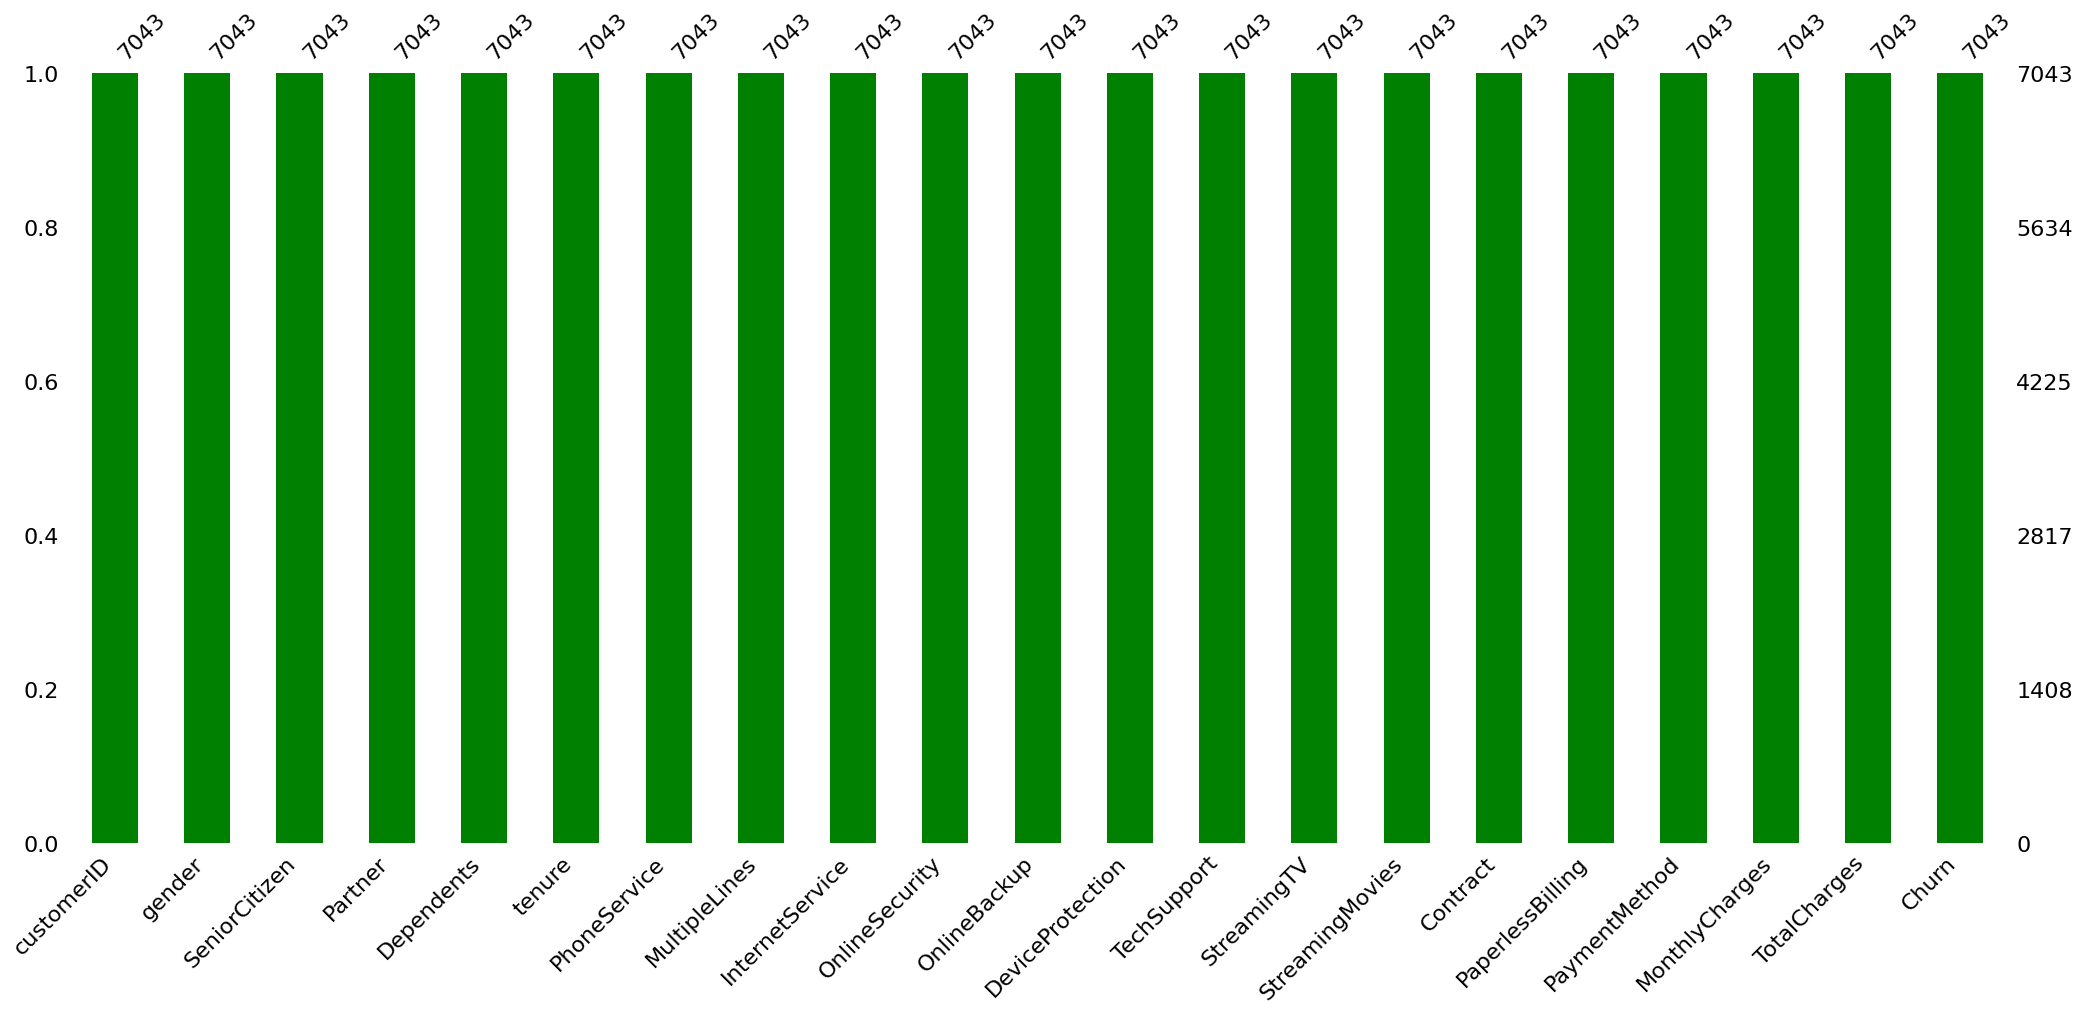

In [12]:
# Another function to visualize missing values
msno.bar(data, color='green');

Seems no missing values in the data set

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


No duplicates

In [15]:
# Unique vales for the target variabe (Churn)
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### FEATURE ENGINEERING/EXPLORATORY DATA ANALYSIS

In [16]:
# Calculate the overall Churn rate

churn_rate_counts = round(data['Churn'].value_counts(normalize=True) * 100,2)

print("Overall Churn Rate:", churn_rate_counts,'%')

Overall Churn Rate: Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64 %


73.46% (5174 customers) of the customers did not churn while the remaining 26.54% (1869 customers)did churn

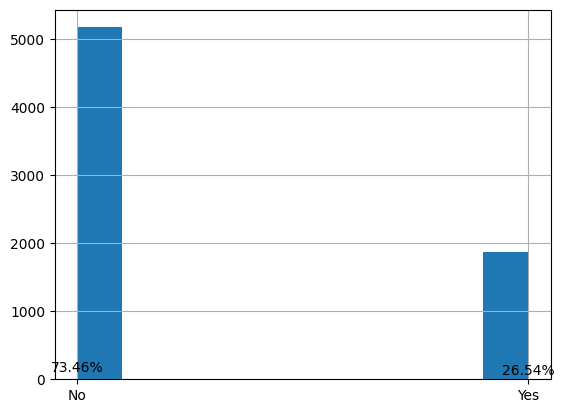

In [17]:
# Visualize the Churn Rate using Histogram
ax = data['Churn'].hist()
total_count = len(data)

# Label the bar
for i, count in enumerate(churn_rate_counts):
    ax.text(i, count, f'{count:.2f}%', ha='center', va='bottom')

plt.show()

Histogram shown Customers Churn Rate

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
print(data['TotalCharges'].dtype)

object


In [20]:
# Check if there are non-numeric values in TotalCharges column
non_numeric_values = data['TotalCharges'].isnull().any()

if non_numeric_values:
    print("There are non-numeric values in the TotalCharges column.")
else:
    print("All values in the TotalCharges column are numeric.")

All values in the TotalCharges column are numeric.


In [21]:
# No non-numeric values in TotalCharges column, data type should be Numerical (float)
# Convert TotalCharges from Categorical datatype (object) to Numerical (float)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].astype(np.float64)

In [22]:
# Recheck data type of TotalCharges
data['TotalCharges'].dtype

dtype('float64')

In [23]:
# Recheck missing value
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in TotalCharges column

In [24]:
# Check minimum Tenure
data['tenure'].min()

np.int64(0)

In [25]:
# Check maximum Tenure
data['tenure'].max()

np.int64(72)

In [26]:
# Group Tenure into 4

data['tenure'].min()
data['tenure'].max()
def Tenure_Grouping (Tenure):
    if Tenure <= 18:
        return '0-18'
    elif Tenure <= 37:
        return '19-37'
    elif Tenure <= 56:
        return '38-56'
    else:
        return '57-72'
    
data['Tenure_Grouping'] = data['tenure'].apply(Tenure_Grouping)

In [27]:
# Create column for customer that has both phone and internet services

def has_internet_and_phone(row):
    if row['PhoneService'] == 'Yes' and row['InternetService'] != 'No':
        return 'Yes'
    else:
        return 'No'

# Apply the function to create the new column 'HasInternetAndPhone'
data['Phone_and_InternetServices'] = data.apply(has_internet_and_phone, axis=1)
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Grouping,Phone_and_InternetServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-18,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,19-37,Yes


In [28]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_Grouping', 'Phone_and_InternetServices'],
      dtype='object')

In [29]:
data.shape

(7043, 23)

### UNIVARIATE ANALYSIS

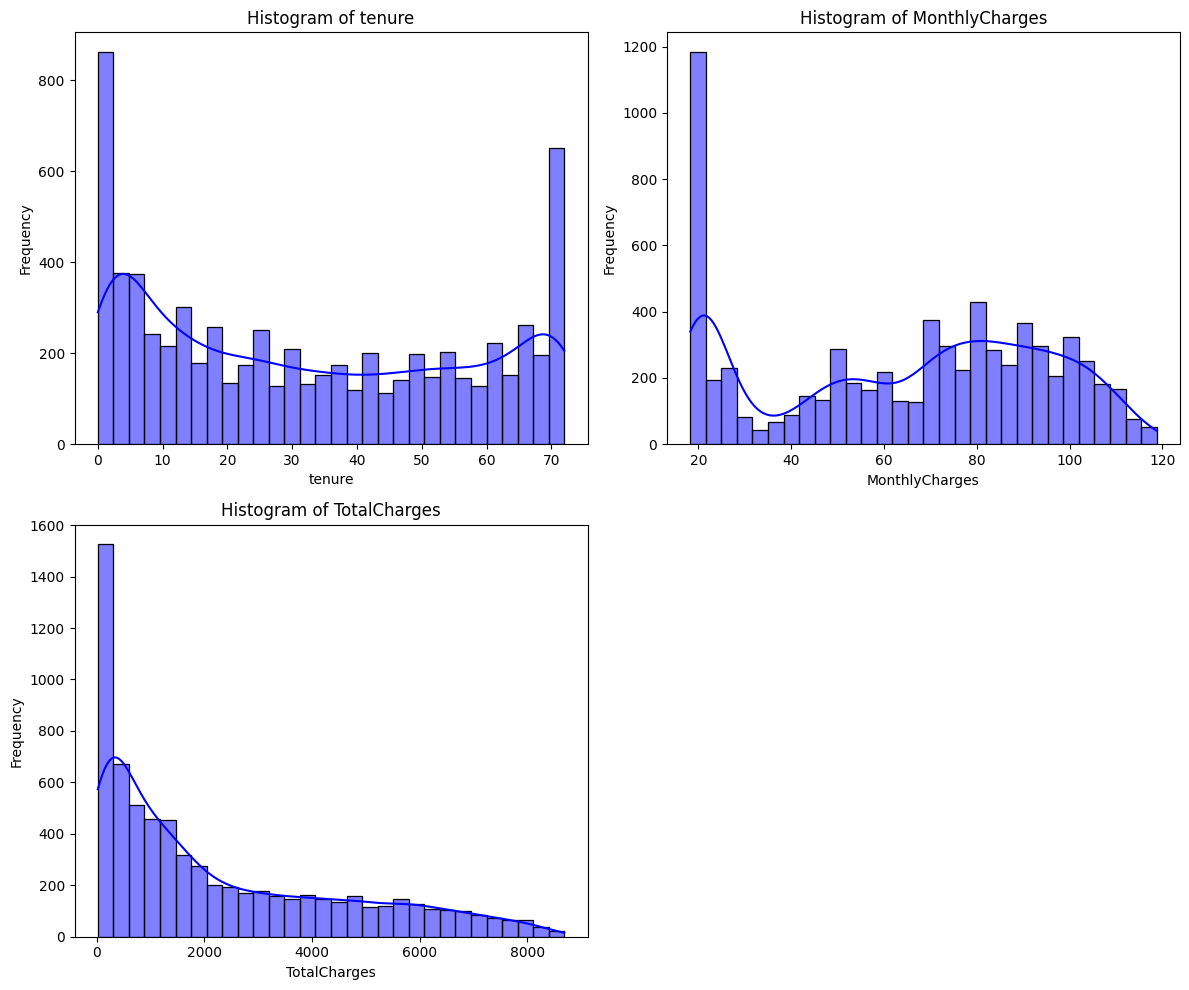

In [30]:
# Visualize the distributions of Numerical variables using Histoplot and Subplot
num_var = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calculate the number of rows and columns for subplots
no_plots = len(num_var)
no_rows = (no_plots // 2) + (no_plots % 2)
no_cols = min(no_plots, 2)

# Create subplots
fig, axes = plt.subplots(no_rows, no_cols, figsize=(12, 5*no_rows))

# Flatten the axes if necessary
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(num_var):
    sns.histplot(data=data, x=feature, ax=axes[i], kde=True, bins=30, color='blue')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for ax in axes[3:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

The Tenure distribution histogram showed number of subcribers peaked above 1000 in the 0-5 tenure, then significantly dropped to almost a uniform distribution of about 400 customers between the tenure 10-65 and peaked again around the tenure of 70.

The histogram for Monthly charges showed almost normal distribution from charges of 35 to 120 and customers of about 100 then peaked at charge 80 with about 500 customers. About 1200 customers are on monthly charges of 20.

The Total charges is skewed to the right with less customers as the charges increases

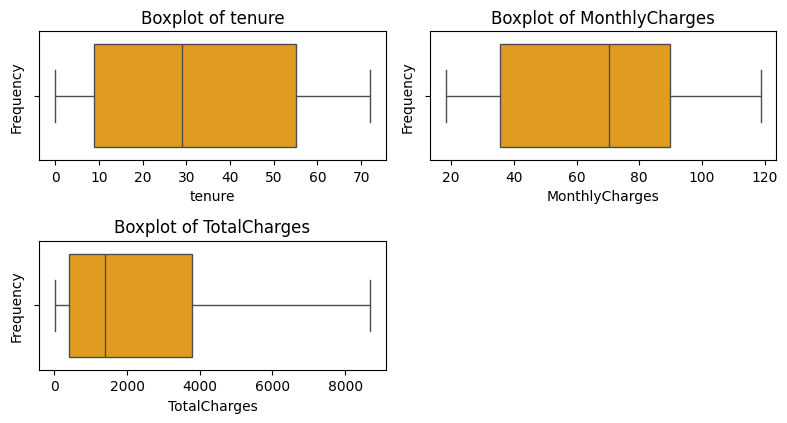

In [31]:
# Visualize the distributions of Numerical variables using Boxplot and Subplot
num_var = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calculate the number of rows and columns for subplots
no_plots = len(num_var)
no_rows = (no_plots // 1) + (no_plots % 1)
no_cols = min(no_plots, 2)

# Create subplots
fig, axes = plt.subplots(no_rows, no_cols, figsize=(8, 2*no_rows))

# Flatten the axes if necessary
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(num_var):
    sns.boxplot(data=data, x=feature, ax=axes[i], color='orange')
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for ax in axes[3:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

- The median of tenure is 30 with no outliers
- Median for Monthly charges is around 70 and there are no outliers
- Median for Total charges is around 1500 and there are no outliers

In [32]:
cat_var = data.select_dtypes(include='object')

In [33]:
cat_var.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Tenure_Grouping,Phone_and_InternetServices
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0-18,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,19-37,Yes
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0-18,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,38-56,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0-18,Yes


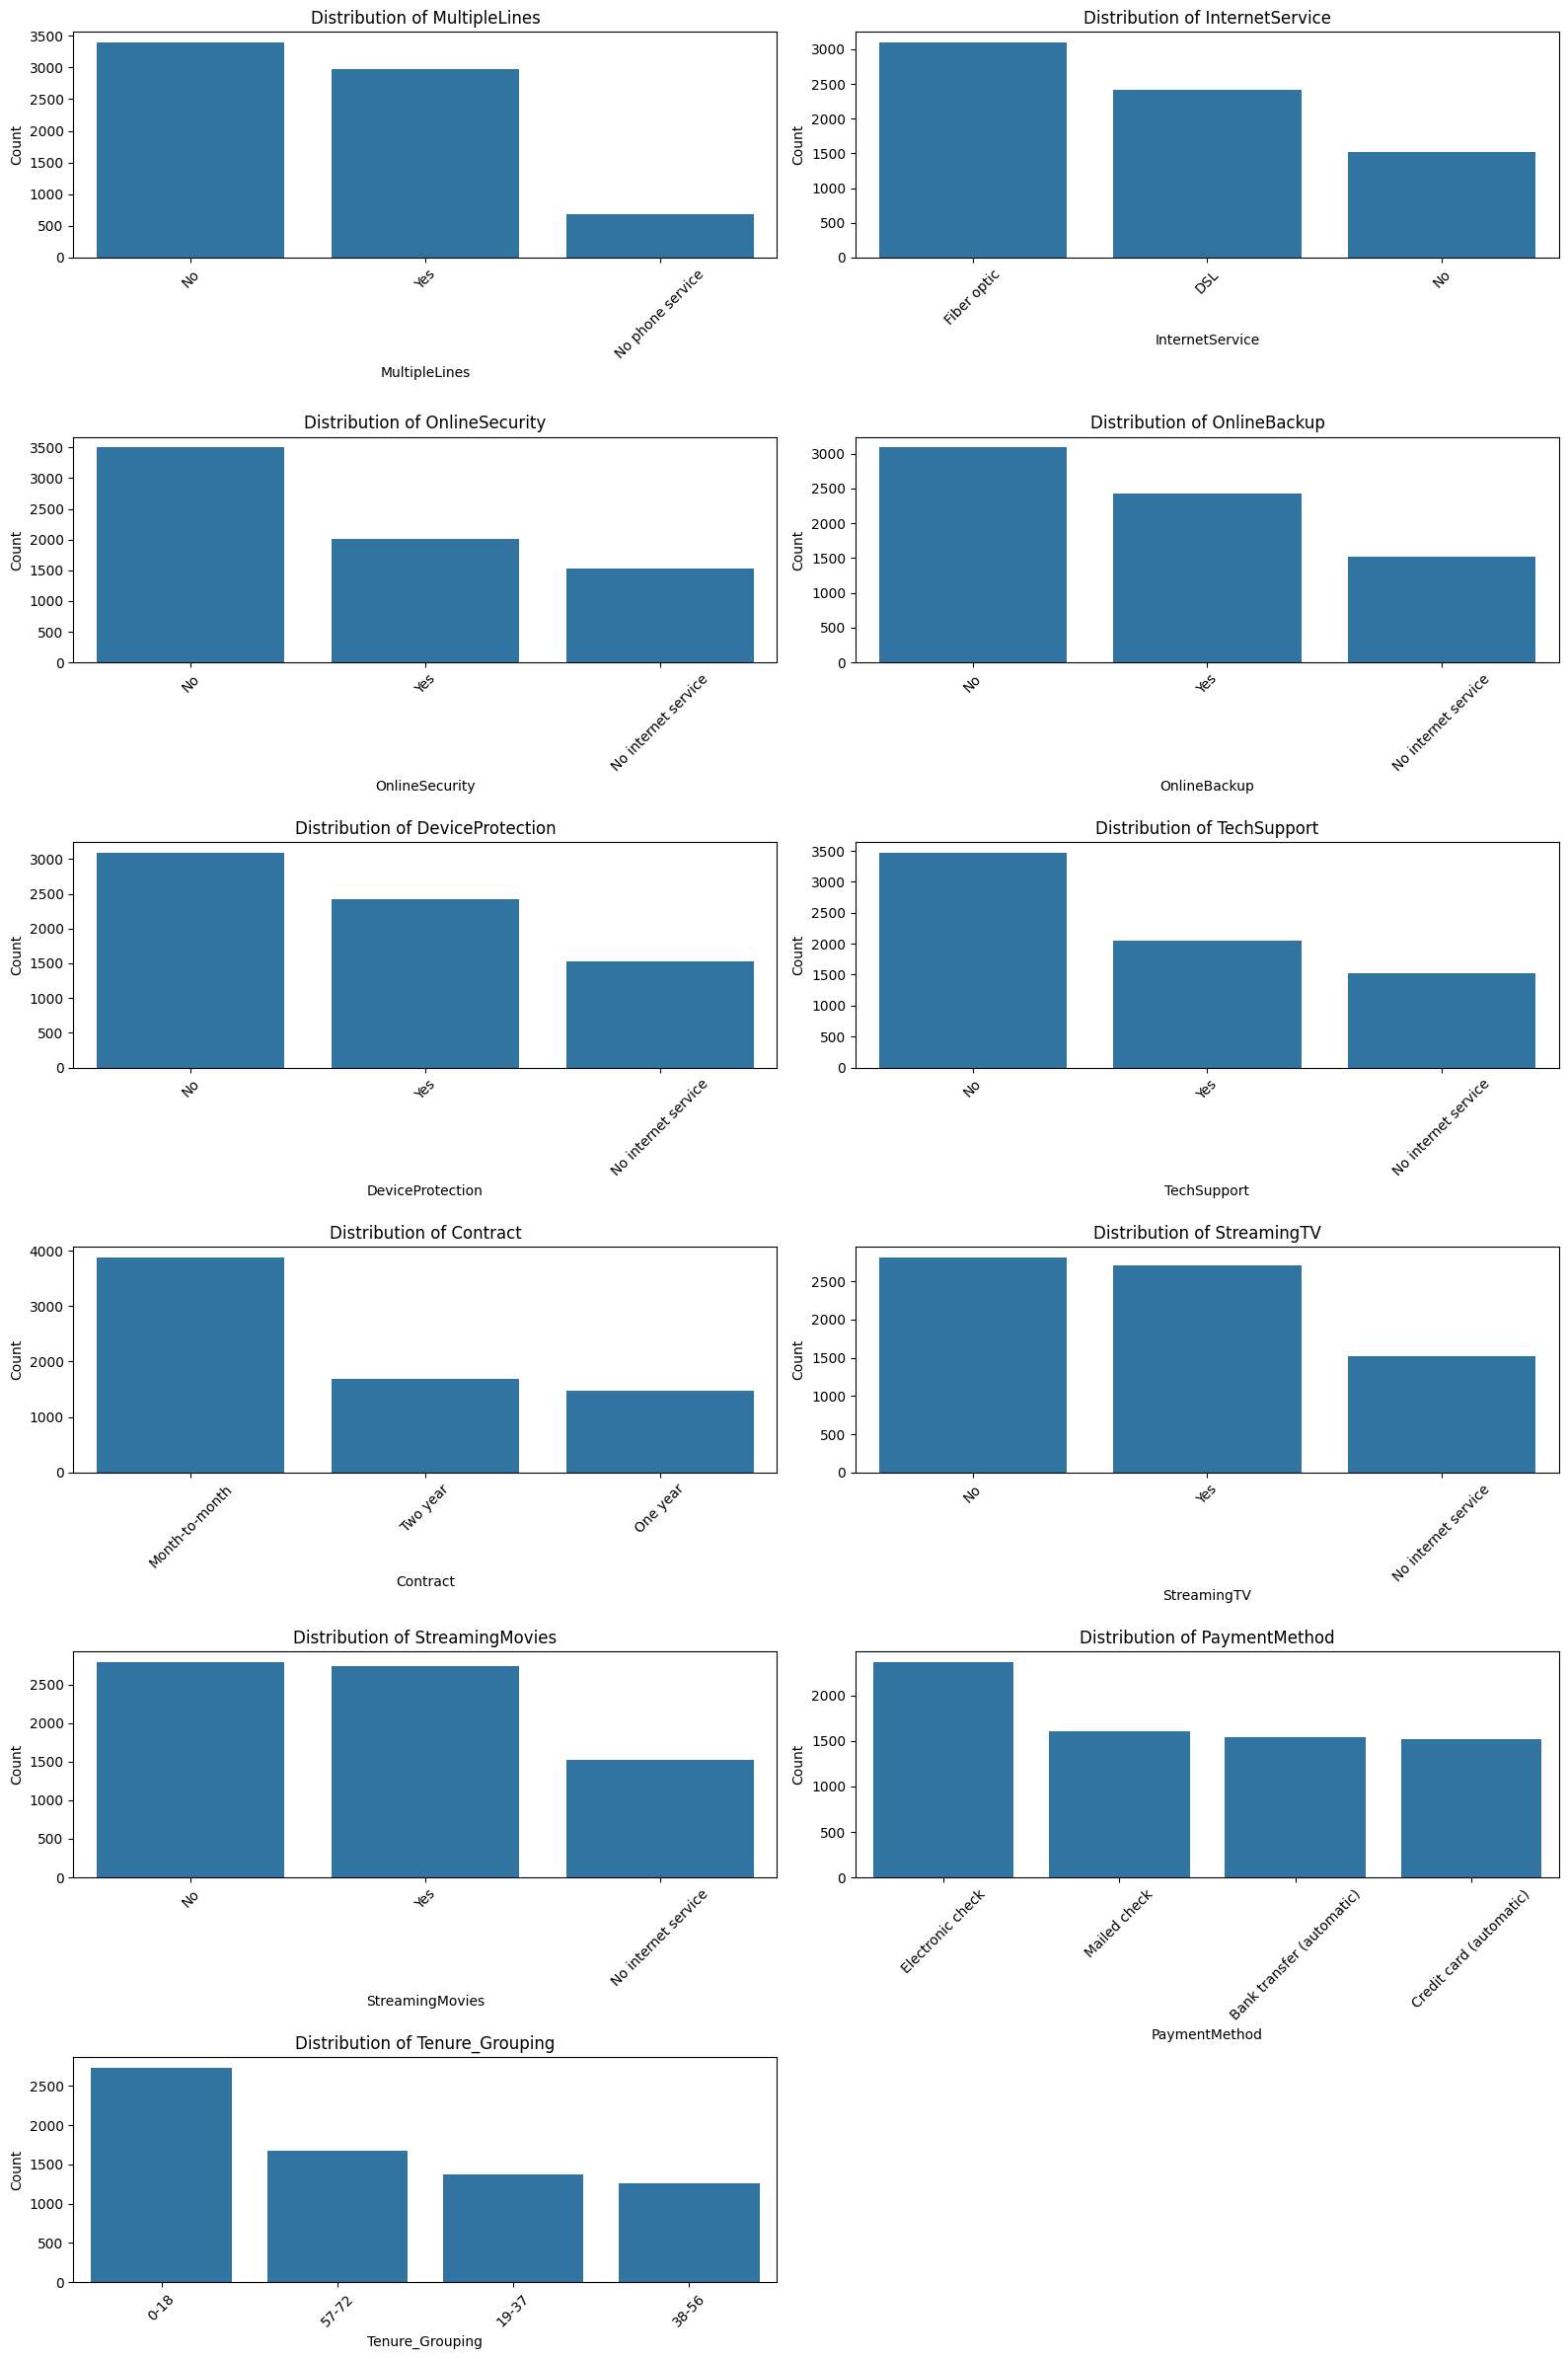

In [34]:
# Visualize the distributions of some categorical variables using columchat and Subplot

cat_feat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'Contract', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'Tenure_Grouping']

# Calculate the number of rows and columns for subplots
no_rows = (len(cat_feat) // 2) + 1
no_cols = 2

# Create subplots
fig, axes = plt.subplots(no_rows, no_cols, figsize=(16,4*no_rows))

# Flatten the axes if necessary
axes = axes.flatten()

# Plot each categorical variable
for a, variable in enumerate(cat_feat):
    sns.countplot(x=variable, data=data, order=data[variable].value_counts().index, ax=axes[a])
    axes[a].set_title(f'Distribution of {variable}')
    axes[a].set_xlabel(variable)
    axes[a].set_ylabel('Count')
    axes[a].tick_params(axis='x', rotation=45)
    
# Hide any unused subplots
for ax in axes[11:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

The above subplot shows column charts of distribution of various variables:-

The chart for customers with Multiple lines showed close to 3500 have no multiple lines while about 3000 do have and almost 500 have no phone service.

Internet Services column chart showed fiber optic has the most subscribed at just above 3000 customers followed by DSL at about 3000 while about 1500 customer have no internet service.

It can be observed from the Online Security graph that about 2000 customers have online security while about 3500 do not have and almost 1500 have no internet service.

From Online Backup chart, more than 3000 customers do not have online backup while almost 2500 have. About 1500 do not have internet service.

In most of the graphs, the distribution between customers that subscribed to the service and those who do not subscibe was around  2000 to 2500 for 'do not have' and about 2500 to 3500 for 'do have'. Around 1500 have no internet service across the variables.

Most favored payment method among the customers is Electronic check (around 3500 customers) while other methods (mailed check, bank transfer (automatic) and credit card (automatic)) stand around 1500 customers each.

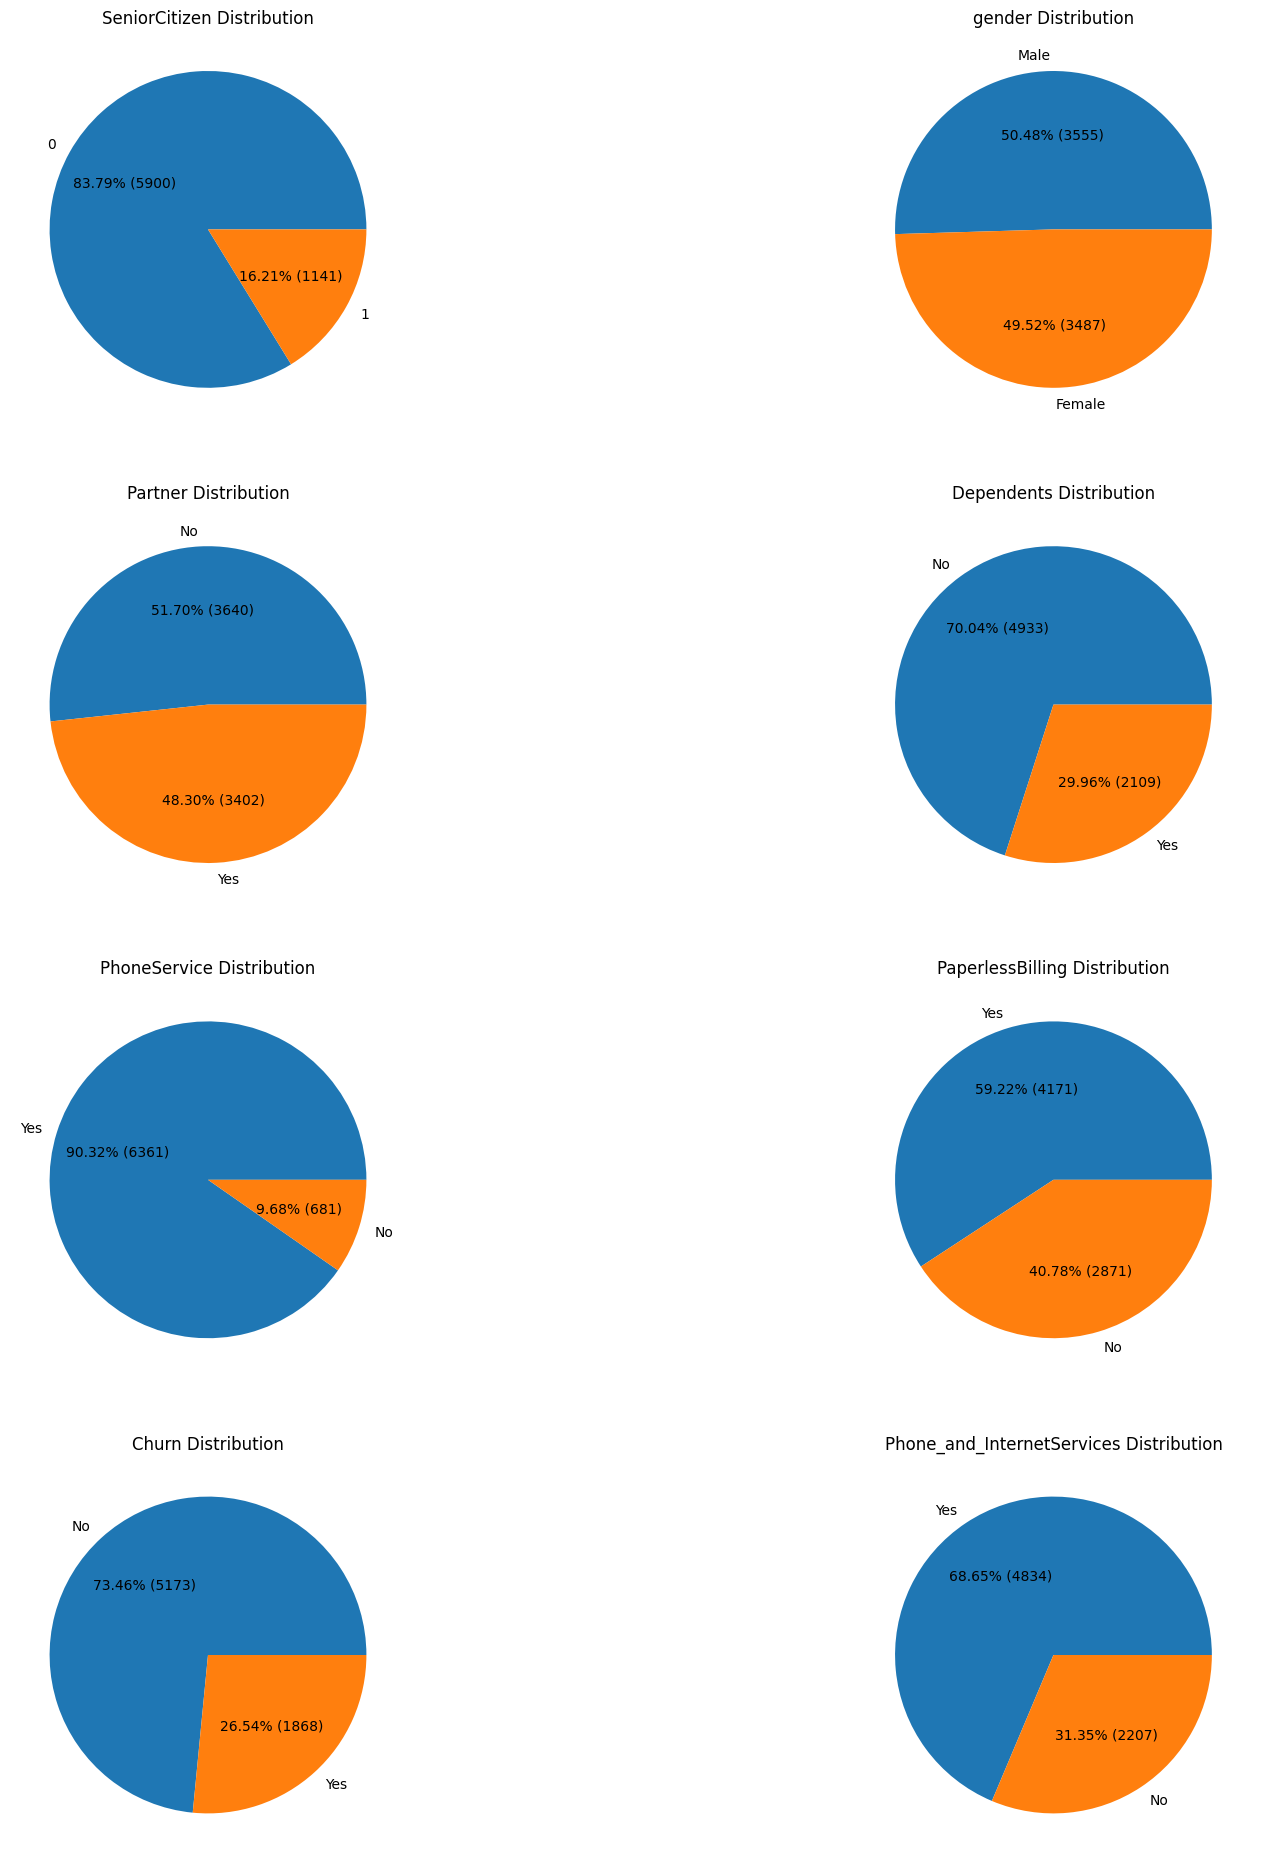

In [35]:
# Visualize the distributions of remaining categorical variables using Piechat and Subplot
import matplotlib.cm as cm

cat_feat1 = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 
                         'Phone_and_InternetServices']

# Calculate the number of rows and columns for subplots
no_rows = (len(cat_feat1) // 2) + 2
no_cols = 2

# Create subplots
fig, axes = plt.subplots(no_rows, no_cols, figsize=(20, 6*no_rows))

# Flatten the axes if necessary
axes = axes.flatten()

# Plot pie charts for each feature
for a, feature in enumerate(cat_feat1):
    # Count the frequency of each category
    counts = data[feature].value_counts()
    # Plot pie chart
    axes[a].pie(counts, labels=counts.index, autopct=lambda p: f'{p:.2f}% ({int(p * counts.sum() / 100)})')
    axes[a].set_title(f'{feature} Distribution')

# Hide any unused subplots
for ax in axes[8:]:
    fig.delaxes(ax)
plt.show()

Pie Chart visualization of remaining features:-

Most of the customers are young people constituting 83.8% while Senior citizens were 16.2% of the total customers.

Male and female were almost equally distributed at 50.5% for male and 49.5& for female.

90.3% of customers have phone service while 9.7% do not have phone service.

Only 30% of the customers have dependents, 70% do not have dependents.

More customers subscribed for paperless billing (59.2%) compare to 40.8% who do not.

51.7% have partners and 48.3% have no partners.

73.5% of the customer do not churn with 26.5% churn.

Customers with both phone and internet services are 68.6% of the total customers.

### BIVARIATE ANALYSIS

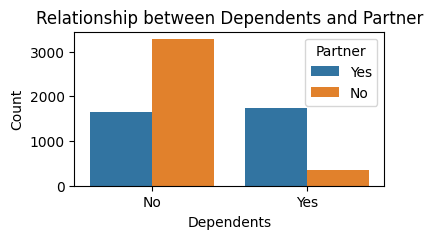

In [36]:
# Relationship between dependents and partner features

plt.figure(figsize=(4,2))
sns.countplot(x="Dependents", hue="Partner", data=data)
plt.title("Relationship between Dependents and Partner")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.show()

Most customers with no partner have no dependent (around 3500)

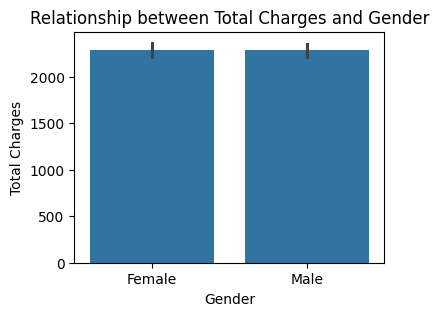

In [37]:
# Total Charge and Gender

plt.figure(figsize=(4,3))
sns.barplot(y="TotalCharges", x="gender", data=data)
plt.title("Relationship between Total Charges and Gender")
plt.xlabel("Gender")
plt.ylabel("Total Charges")
plt.show()

Relationship between Total charges and gender is almost evenly distributed between both genders

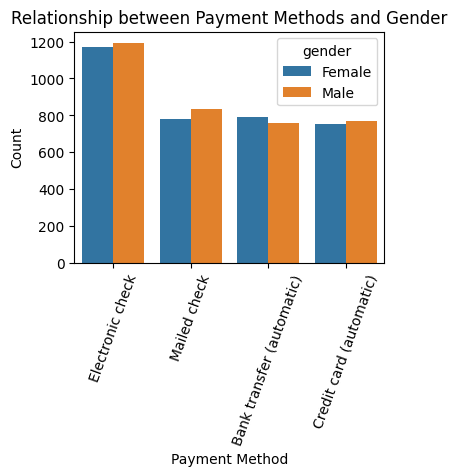

In [38]:
# Payment Methods and Gender

plt.figure(figsize=(4,3))
sns.countplot(x="PaymentMethod", hue="gender", data=data)
plt.title("Relationship between Payment Methods and Gender")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.show()

The most favored method of payment by both male and female is Electronic check. The second prefered method by male is the Mailed check but it is Bank transfer (automatic).

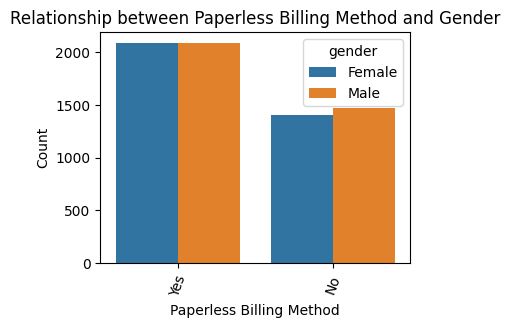

In [39]:
# Billing Methods and Gender

plt.figure(figsize=(4,3))
sns.countplot(x="PaperlessBilling", hue="gender", data=data)
plt.title("Relationship between Paperless Billing Method and Gender")
plt.xlabel("Paperless Billing Method")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.show()

Both genders prefer paperless billing method

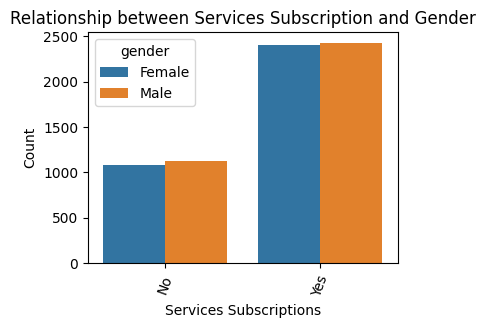

In [40]:
# Both Phone&Internet Services and Gender

plt.figure(figsize=(4,3))
sns.countplot(x="Phone_and_InternetServices", hue="gender", data=data)
plt.title("Relationship between Services Subscription and Gender")
plt.xlabel("Services Subscriptions")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.show()

Most of male and female have both phone and internet services at close to 2500 compare to about 1100 who do not.

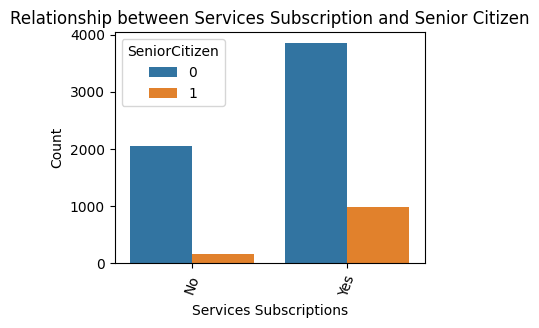

In [41]:
# Both Phone&Internet Services and Senior Citizen

plt.figure(figsize=(4,3))
sns.countplot(x="Phone_and_InternetServices", hue="SeniorCitizen", data=data)
plt.title("Relationship between Services Subscription and Senior Citizen")
plt.xlabel("Services Subscriptions")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.show()

Most senior citizens have both phone and internet services (about 1000) while about 100 do not have.
Among non_senior citizens, almost 4000 have both services and about 2000 do not have.

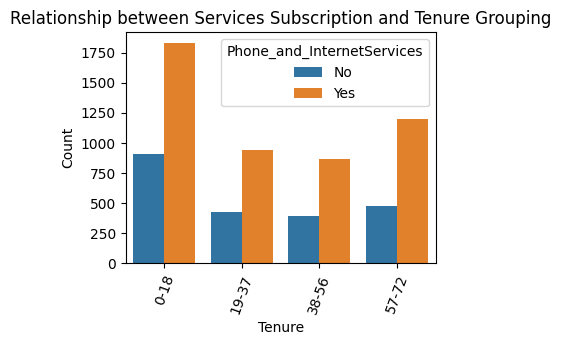

In [42]:
# Both Phone&Internet Services and Tenure

plt.figure(figsize=(4,3))
sns.countplot(x="Tenure_Grouping", hue="Phone_and_InternetServices", data=data)
plt.title("Relationship between Services Subscription and Tenure Grouping")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.show()

Across all the tenure group, more customers have both phone and internet services than those who do not have.

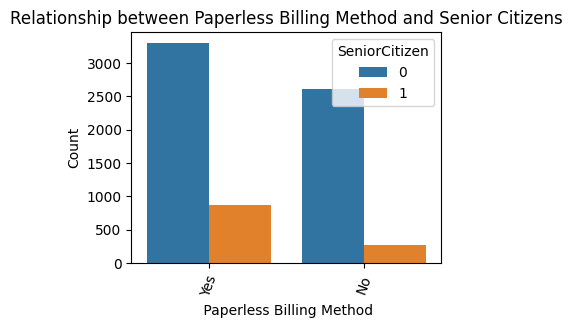

In [43]:
# Billing Methods and Senior Citizen

plt.figure(figsize=(4,3))
sns.countplot(x="PaperlessBilling", hue="SeniorCitizen", data=data)
plt.title("Relationship between Paperless Billing Method and Senior Citizens")
plt.xlabel(" Paperless Billing Method")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.show()

Both senior citizens and non-senior citizens prefer paperless billing method.

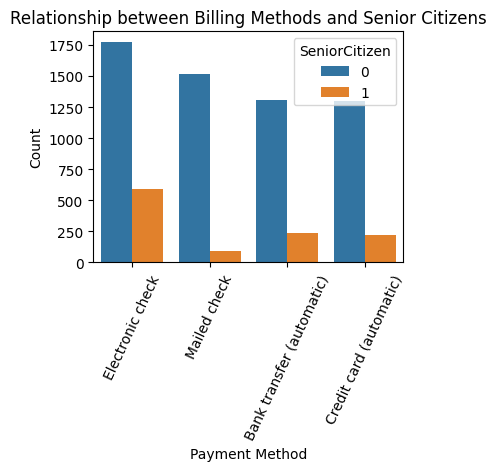

In [44]:
# Payment Methods and Senior Citizen

plt.figure(figsize=(4,3))
sns.countplot(x="PaymentMethod", hue="SeniorCitizen", data=data)
plt.title("Relationship between Billing Methods and Senior Citizens")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=65)
plt.show()

The most prefered payment method by both senior and no-senior citizens is Electronic check (about 600 for seniors and 1750 for non-seniors). Bank transfer (automatic) and credit card (automatic) shared second among the senior citizen while mailed check is the least common at about 100. For non-senior citizens, mailed check is the second common while bank transfer (automatic) and credit card (automatic) shared the least common.

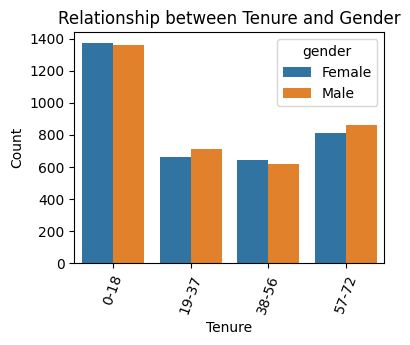

In [45]:
# Tenure and Gender

plt.figure(figsize=(4,3))
sns.countplot(x="Tenure_Grouping", hue="gender", data=data)
plt.title("Relationship between Tenure and Gender")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.show()

Close to 1400 of each gender have been with the company for just 0-18 tenure group while about 850 males and about 800 females have been wit company for 57-72 tenure group.

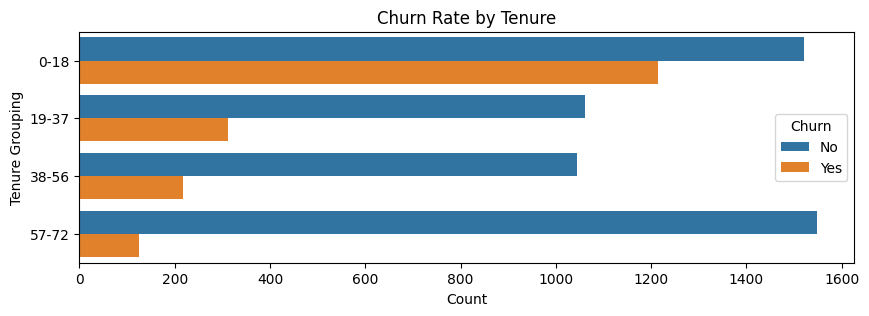

In [46]:
#Churn Rate by Tenure

plt.figure(figsize=(10, 3))
sns.countplot(y='Tenure_Grouping', hue='Churn', data=data)
plt.ylabel('Tenure Grouping')
plt.xlabel('Count')
plt.title('Churn Rate by Tenure')
plt.show()

Those in the 0-18 tenure group churn most while the least churn are in the 57-72 tenure group (?The longer customers have been with a company, the more loyal they become).

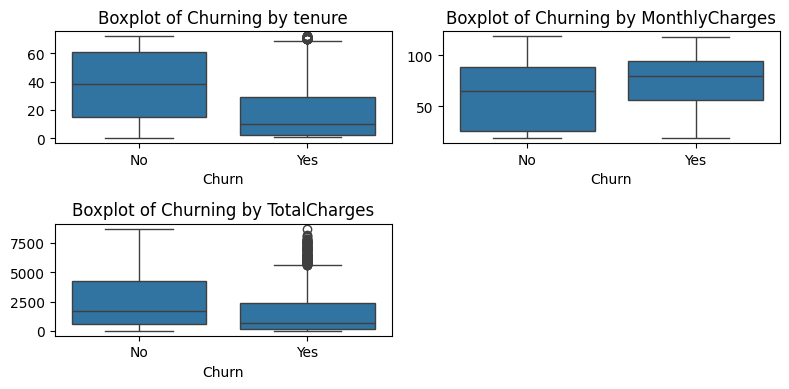

In [47]:
# Boxplots for Tenure, Monthly Charges, Total Charge

num_cat = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calculate the number of rows and columns for subplots
no_plots = len(num_cat)
no_rows = (no_plots // 2) + (no_plots % 2)
no_cols = min(no_plots, 2)

# Create subplots
fig, axes = plt.subplots(no_rows, no_cols, figsize=(8, 2*no_rows))

# Flatten the axes if necessary
axes = axes.flatten()

# Plot boxplots for each feature
for i, feature in enumerate(num_cat):
    sns.boxplot(y=feature, x='Churn', data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of Churning by {feature}')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel('')

# Hide any unused subplots
for i in range(no_plots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

From the above boxplots:-

The median tenure for those who churn is around 10 while the median tenure for those who do not churn is around 40.

For monthly charges, the median for those that churs is around 80 and the median for those who do not churn is about 65.

From total charges boxplot, median for those who churn is about 500 but many outliers after 5000. Median for those who do not churn is close to 2000.

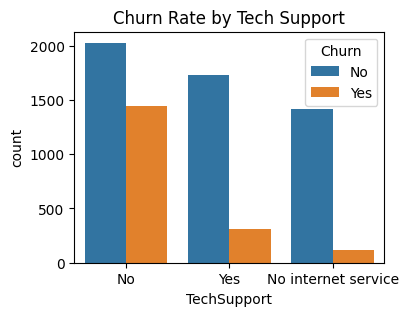

In [48]:
plt.figure(figsize=(4,3))
sns.countplot(x=('TechSupport'), hue='Churn', data=data)
plt.title('Churn Rate by Tech Support');

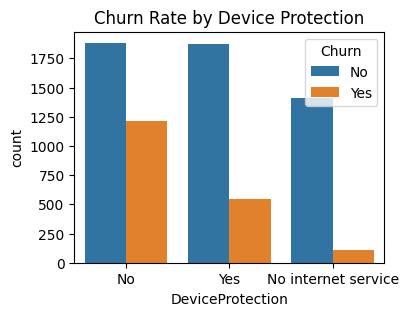

In [49]:
plt.figure(figsize=(4,3))
sns.countplot(x=('DeviceProtection'), hue=('Churn'), data=data)
plt.title('Churn Rate by Device Protection');

Customers with no device protection churn more than thosethat have the service

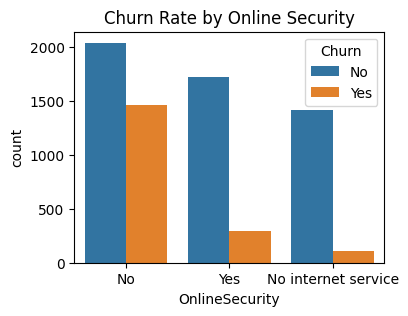

In [50]:
plt.figure(figsize=(4,3))
sns.countplot(x=('OnlineSecurity'), hue=('Churn'), data=data)
plt.title('Churn Rate by Online Security');

Customers with no online security churn more than those with online security

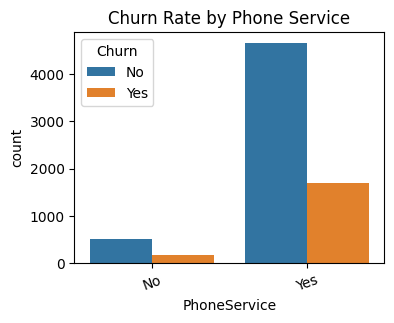

In [51]:
plt.figure(figsize=(4,3))
sns.countplot(hue=('Churn'), x=('PhoneService'), data=data)
plt.title('Churn Rate by Phone Service')
plt.xticks(rotation=20);

Customers with phone service churn more than those with no phone service

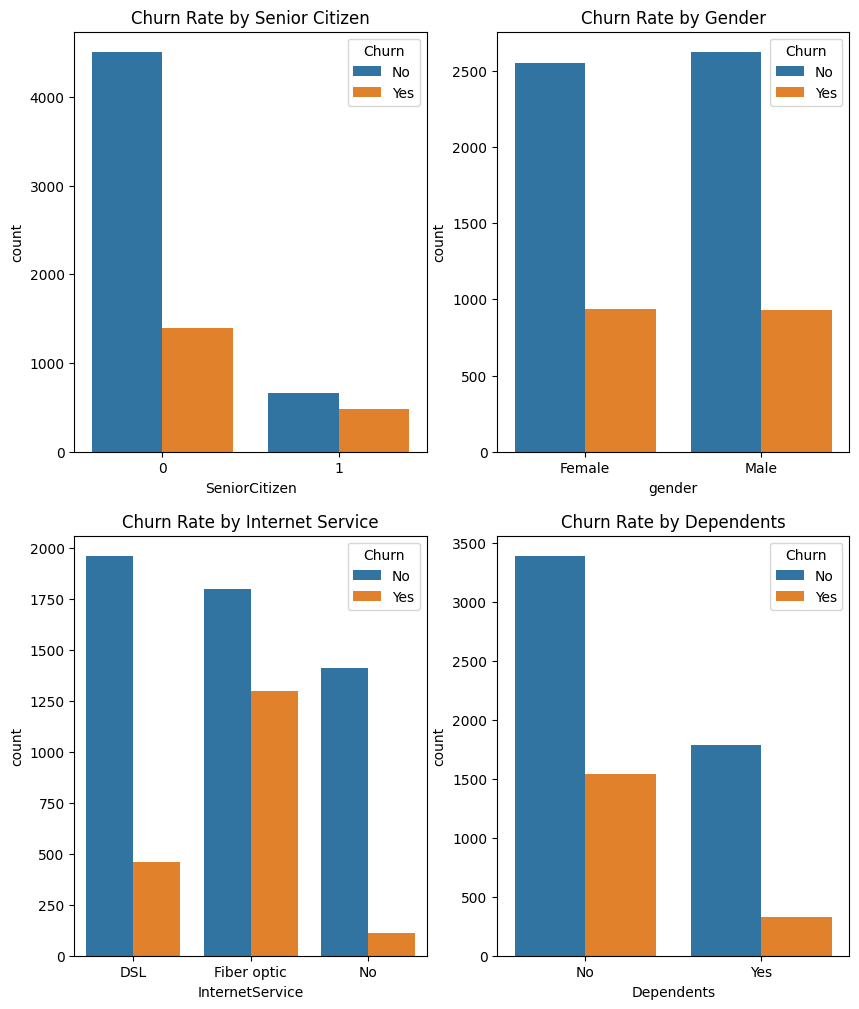

<Figure size 800x2000 with 0 Axes>

In [52]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,12))
plt.figure(figsize=(8,20))

sns.countplot(x=('SeniorCitizen'), hue=('Churn'), data=data, ax=axs[0,0])
axs[0,0].set_title('Churn Rate by Senior Citizen');

sns.countplot(x=('gender'),hue=('Churn'), data=data, ax=axs[0,1])
axs[0,1].set_title('Churn Rate by Gender');

sns.countplot(x=('Dependents'), hue=('Churn'), data=data, ax=axs[1,1])
axs[1,1].set_title('Churn Rate by Dependents');

sns.countplot(x=('InternetService'), hue=('Churn'), data=data, ax=axs[1,0])
axs[1,0].set_title('Churn Rate by Internet Service');

From the above charts:-

- Senior citizens have higher churn rate than non-senior citizens.
- Churn rate is almost equal for both genders.
- Among Internet Service subscribers, Fibre optic subscribers churn most
- Customers with no dependents churn more.

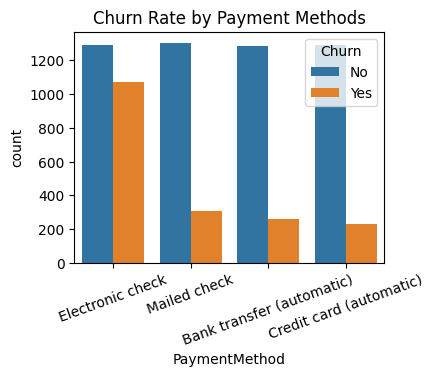

In [53]:
plt.figure(figsize=(4,3))
sns.countplot(hue=('Churn'), x=('PaymentMethod'), data=data)
plt.title('Churn Rate by Payment Methods')
plt.xticks(rotation=20);

Customers paying by Electronic check Payment Method churn most.

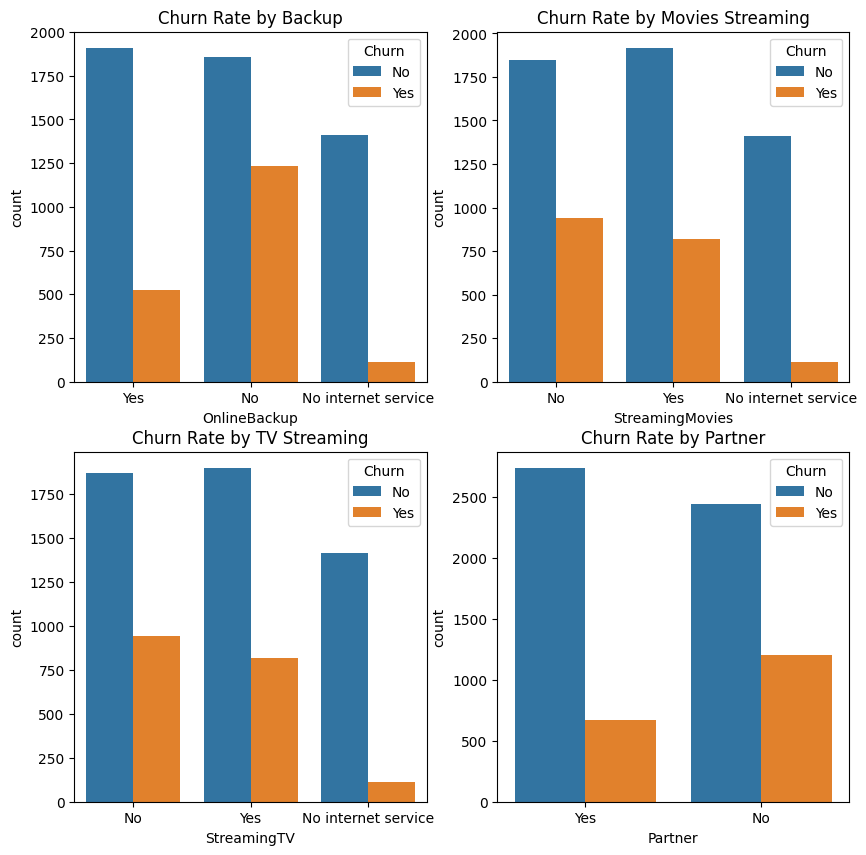

<Figure size 600x400 with 0 Axes>

In [54]:
# Plot Churn Rate of remaining variables

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.figure(figsize=(6,4))

sns.countplot(hue=('Churn'), x=('StreamingTV'), data=data, ax=axs[1,0])
axs[1,0].set_title('Churn Rate by TV Streaming');

sns.countplot(hue=('Churn'), x=('Partner'), data=data, ax=axs[1,1])
axs[1,1].set_title('Churn Rate by Partner');

sns.countplot(hue=('Churn'), x=('StreamingMovies'), data=data, ax=axs[0,1])
axs[0,1].set_title('Churn Rate by Movies Streaming');

sns.countplot(hue=('Churn'), x=('OnlineBackup'), data=data, ax=axs[0,0])
axs[0,0].set_title('Churn Rate by Backup');

It can be observed from the charts above:-
- Customers with No Partner, No Online Backup, No Movies Streaming and No TV Streaming churn more

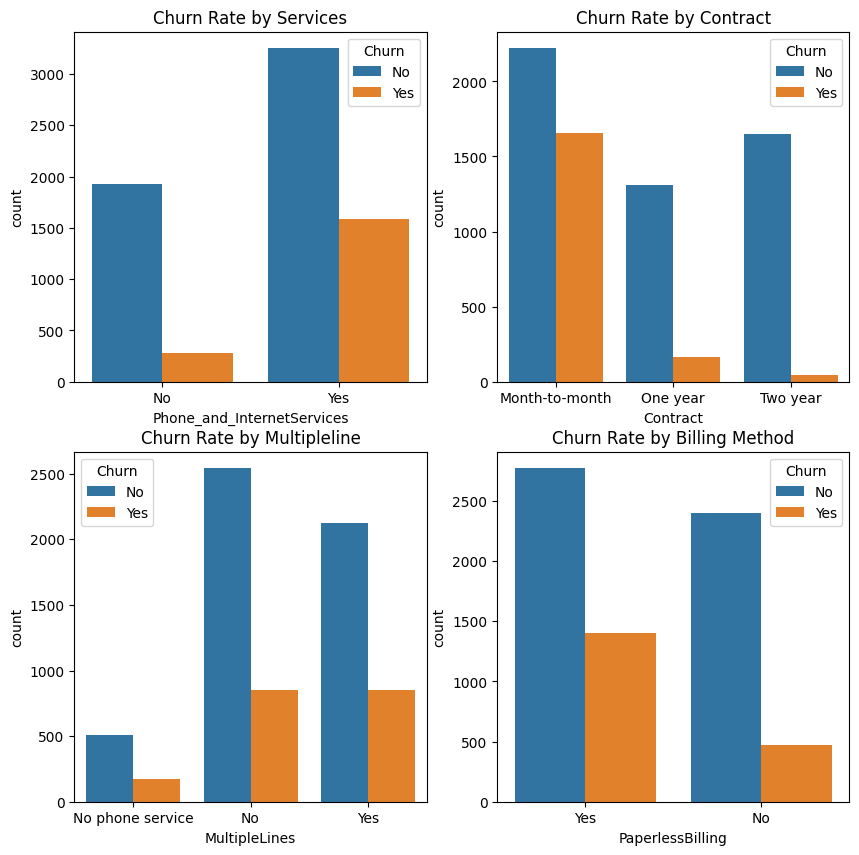

<Figure size 600x400 with 0 Axes>

In [55]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.figure(figsize=(6,4))

sns.countplot(hue=('Churn'), x=('Phone_and_InternetServices'), data=data, ax=axs[0,0])
axs[0,0].set_title('Churn Rate by Services');

sns.countplot(hue=('Churn'),x=('Contract'), data=data, ax=axs[0,1])
axs[0,1].set_title('Churn Rate by Contract');

sns.countplot(hue=('Churn'), x=('MultipleLines'), data=data, ax=axs[1,0])
axs[1,0].set_title('Churn Rate by Multipleline');

sns.countplot(hue=('Churn'), x=('PaperlessBilling'), data=data, ax=axs[1,1])
axs[1,1].set_title('Churn Rate by Billing Method');

It can be observed from the charts above:-
- Customers that have both Phone and Internet services churn more.
- Customers on Month-to-Month contract churn most while the least churn are those on Two year contract.
- Customers having Multiple lines churn more.
- Customers with Paperless billing method also churn more.

### MULTIVARIATE ANALYSIS

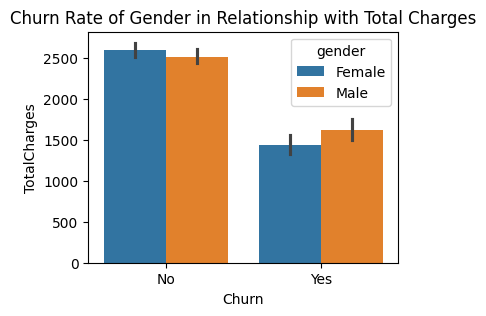

In [56]:
# Chur Rate of Gender with Total Charges

plt.figure(figsize=(4,3))
sns.barplot(x=('Churn'), y=('TotalCharges'), hue='gender', data=data)
plt.title('Churn Rate of Gender in Relationship with Total Charges');

Both male and female churn more at TotalCharges below 1500

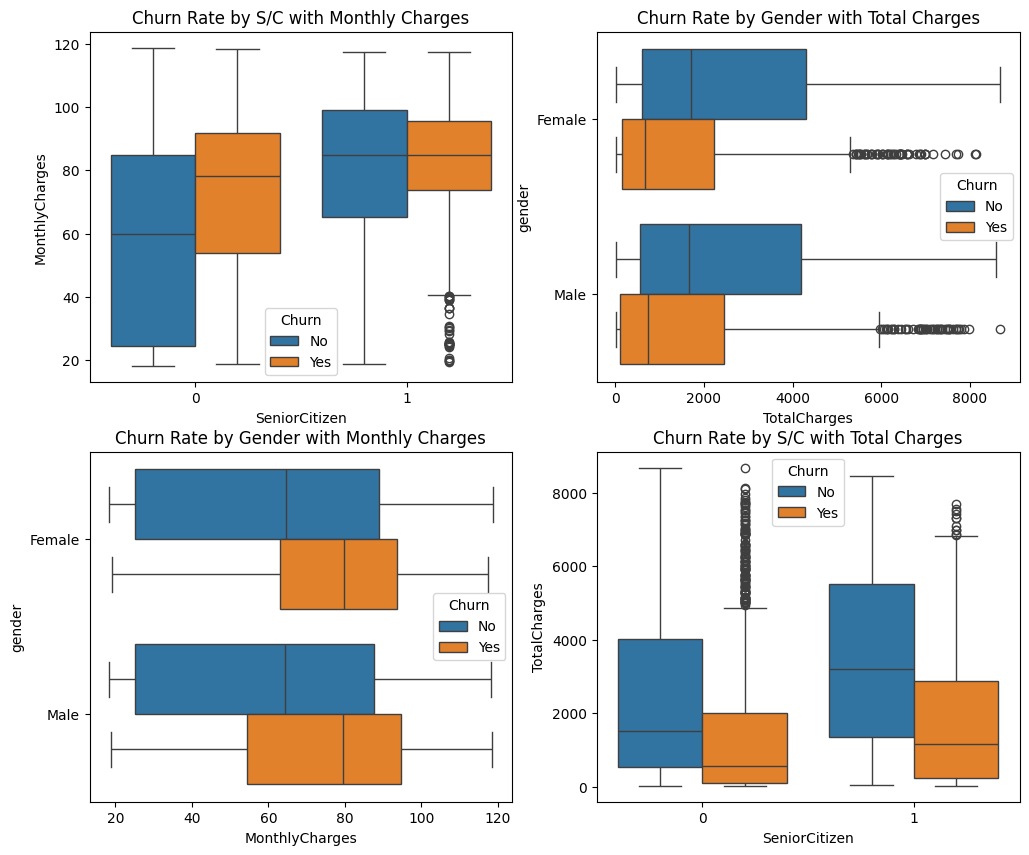

In [57]:
# Churn Rate of paired variables and other relationships
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
#plt.figure(figsize=(4,3))

sns.boxplot(x=('SeniorCitizen'), y=('MonthlyCharges'), hue=('Churn'), data=data, ax=axs[0,0]);
axs[0,0].set_title('Churn Rate by S/C with Monthly Charges');

sns.boxplot(y=('gender'), x=('TotalCharges'), hue=('Churn'), data=data, ax=axs[0,1])
axs[0,1].set_title('Churn Rate by Gender with Total Charges');

sns.boxplot(y=('gender'), x=('MonthlyCharges'), hue=('Churn'), data=data, ax=axs[1,0]);
axs[1,0].set_title('Churn Rate by Gender with Monthly Charges');

sns.boxplot(x=('SeniorCitizen'), y=('TotalCharges'), hue=('Churn'), data=data, ax=axs[1,1]);
axs[1,1].set_title('Churn Rate by S/C with Total Charges');

From the box plots:-
- The median MonthlyCharges of Senior citizens that churn and those who do not churn is around 85 with many outliers below 40 for those that churn
- Senior citizens churn at median TotalCharges of around 1000 with outliers above 7000, young customers churn at median TotalCharges of around 500 and outliers above 5000
- The median TotalCharges for male and female is below 1000 and outliers above 5000 for female while male have outliers above 6000
- The meadian MonthlyCharges for both gender is 80

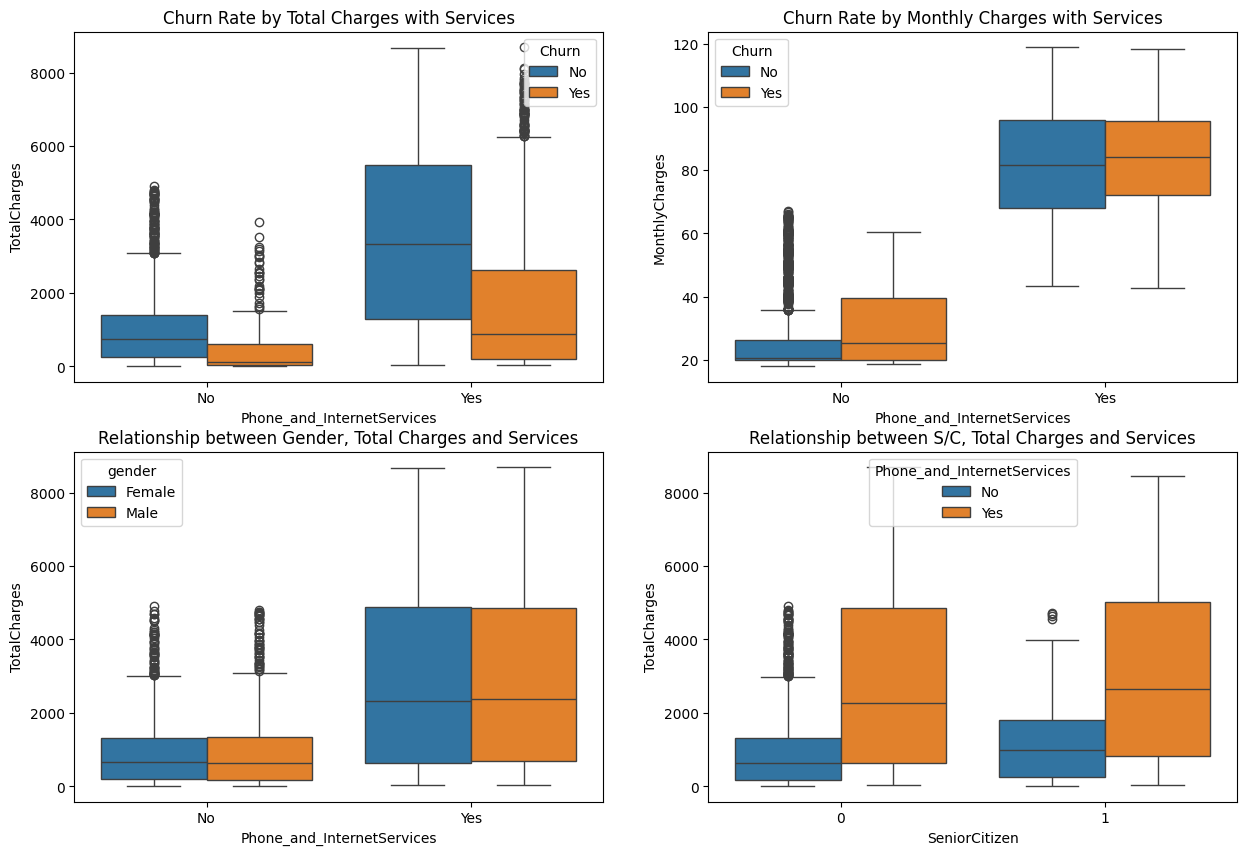

In [58]:
# Churn Rate of paired variables and other relationships
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(y=('TotalCharges'), x=('Phone_and_InternetServices'), hue=('Churn'), data=data, ax=axs[0,0]);
axs[0,0].set_title('Churn Rate by Total Charges with Services');

sns.boxplot(y=('MonthlyCharges'), x=('Phone_and_InternetServices'), hue=('Churn'), data=data, ax=axs[0,1])
axs[0,1].set_title('Churn Rate by Monthly Charges with Services');

sns.boxplot(y=('TotalCharges'), x=('Phone_and_InternetServices'), hue=('gender'), data=data, ax=axs[1,0]);
axs[1,0].set_title('Relationship between Gender, Total Charges and Services');

sns.boxplot(x=('SeniorCitizen'), y=('TotalCharges'), hue=('Phone_and_InternetServices'), data=data, ax=axs[1,1]);
axs[1,1].set_title('Relationship between S/C, Total Charges and Services');

- The median total charges for churned customers with both phone and internet services is below 1000 with many outliers
- Customer with both phone and internet services churn at median monthly charges of around 90
- The median total charges for both genders with both phone and internet services is almost the same at around 2000

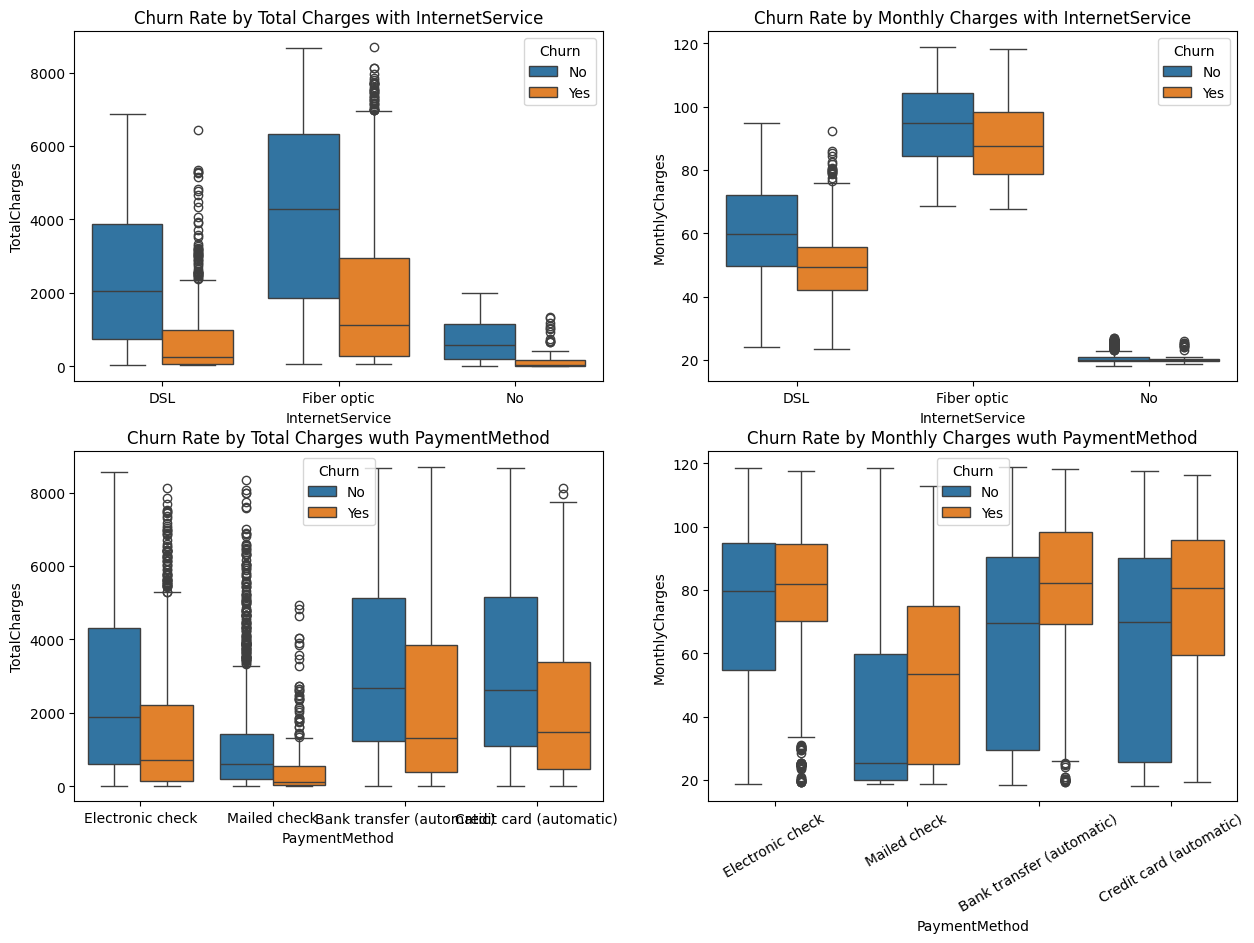

In [59]:
# Churn Rate of paired variables and other relationships
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.xticks(rotation=30)

sns.boxplot(y=('TotalCharges'), x=('InternetService'), hue=('Churn'), data=data, ax=axs[0,0]);
axs[0,0].set_title('Churn Rate by Total Charges with InternetService');

sns.boxplot(y=('MonthlyCharges'), x=('InternetService'), hue=('Churn'), data=data, ax=axs[0,1])
axs[0,1].set_title('Churn Rate by Monthly Charges with InternetService');

sns.boxplot(y=('TotalCharges'), x=('PaymentMethod'), hue=('Churn'), data=data, ax=axs[1,0]);
axs[1,0].set_title('Churn Rate by Total Charges wuth PaymentMethod');

sns.boxplot(x=('PaymentMethod'), y=('MonthlyCharges'), hue=('Churn'), data=data, ax=axs[1,1]);
axs[1,1].set_title('Churn Rate by Monthly Charges wuth PaymentMethod');

Fiber optic churn most at median total charges of about 1000 and outliers above 7000 and median monthly charges of about 90
DSL subscribers churn at median total charges of about 500 and outliers above 2500 and monthly charges of about 50 with outliers above 80
Customers paying bank transfer churn most with total charges median of 1000, followed by card credit with median value of 1000. Electronic check payment churn at total charges median of about 750 but many outliers above 5500. Least churn is mailed check with median of around 250 and outliers above 1000.


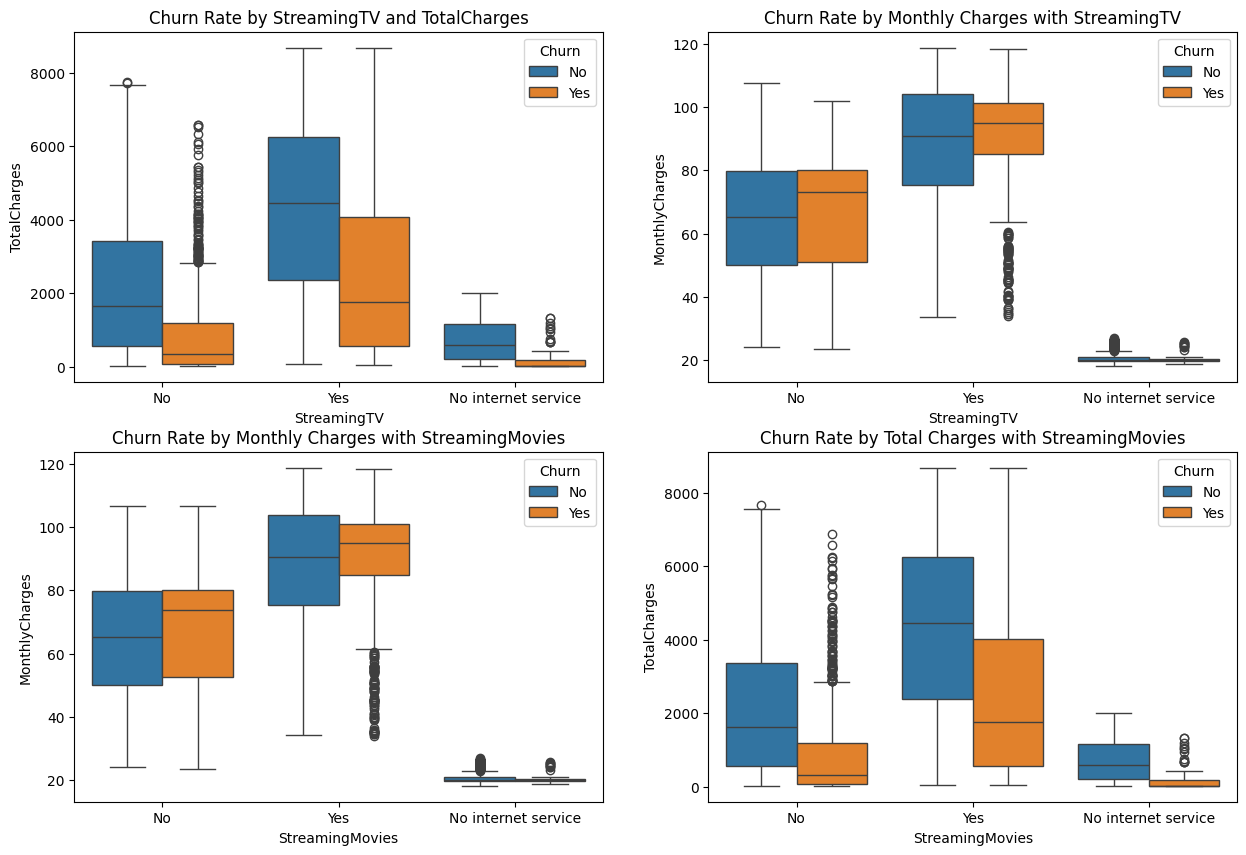

In [60]:
# Churn Rate of paired variables and other relationships
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(y=('TotalCharges'), x=('StreamingTV'), hue=('Churn'), data=data, ax=axs[0,0]);
axs[0,0].set_title('Churn Rate by StreamingTV and TotalCharges');

sns.boxplot(y=('MonthlyCharges'), x=('StreamingTV'), hue=('Churn'), data=data, ax=axs[0,1])
axs[0,1].set_title('Churn Rate by Monthly Charges with StreamingTV');

sns.boxplot(y=('MonthlyCharges'), x=('StreamingMovies'), hue=('Churn'), data=data, ax=axs[1,0]);
axs[1,0].set_title('Churn Rate by Monthly Charges with StreamingMovies');

sns.boxplot(x=('StreamingMovies'), y=('TotalCharges'), hue=('Churn'), data=data, ax=axs[1,1]);
axs[1,1].set_title('Churn Rate by Total Charges with StreamingMovies');

- Customer wth no StreamingTV and no StreamingMovies have median total charges around 500 with many outliers above 3000
- Customer that Stream TV and those that Stream Movies have median montlhy charges around 95 with many outliers below 60

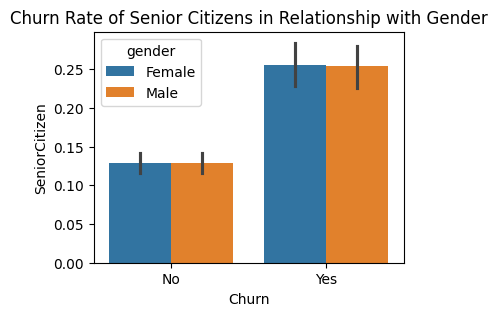

In [61]:
plt.figure(figsize=(4,3))
sns.barplot(y=('SeniorCitizen'), x=('Churn'), hue='gender', data=data)
plt.title('Churn Rate of Senior Citizens in Relationship with Gender');

Many senior citizens churn and the distribution is almost even between the gender

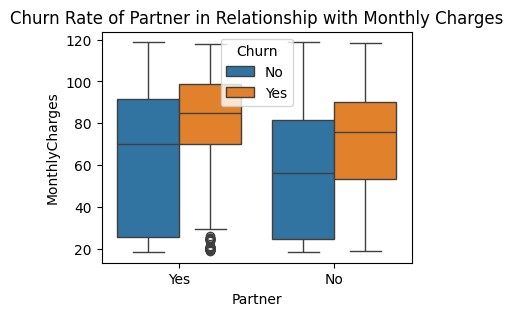

In [62]:
plt.figure(figsize=(4,3))
sns.boxplot(x=('Partner'), y=('MonthlyCharges'), hue='Churn', data=data)
plt.title('Churn Rate of Partner in Relationship with Monthly Charges');

The median monthly charges for customers with partner and churn is around 85 and some outliers below 30 while the median monthly charges for customers without parner but churn is below 80.

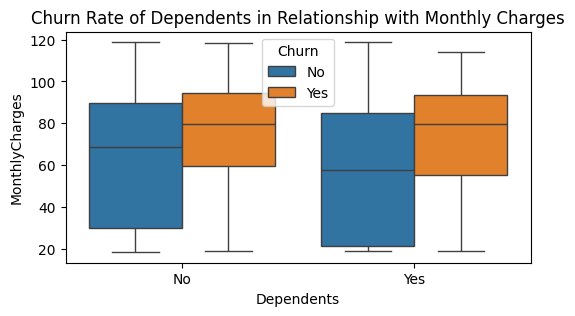

In [63]:
plt.figure(figsize=(6,3))
sns.boxplot(x=('Dependents'), y=('MonthlyCharges'), hue='Churn', data=data)
plt.title('Churn Rate of Dependents in Relationship with Monthly Charges');

Both customers with and without dependents churn with median monthly charges around 80 both groups

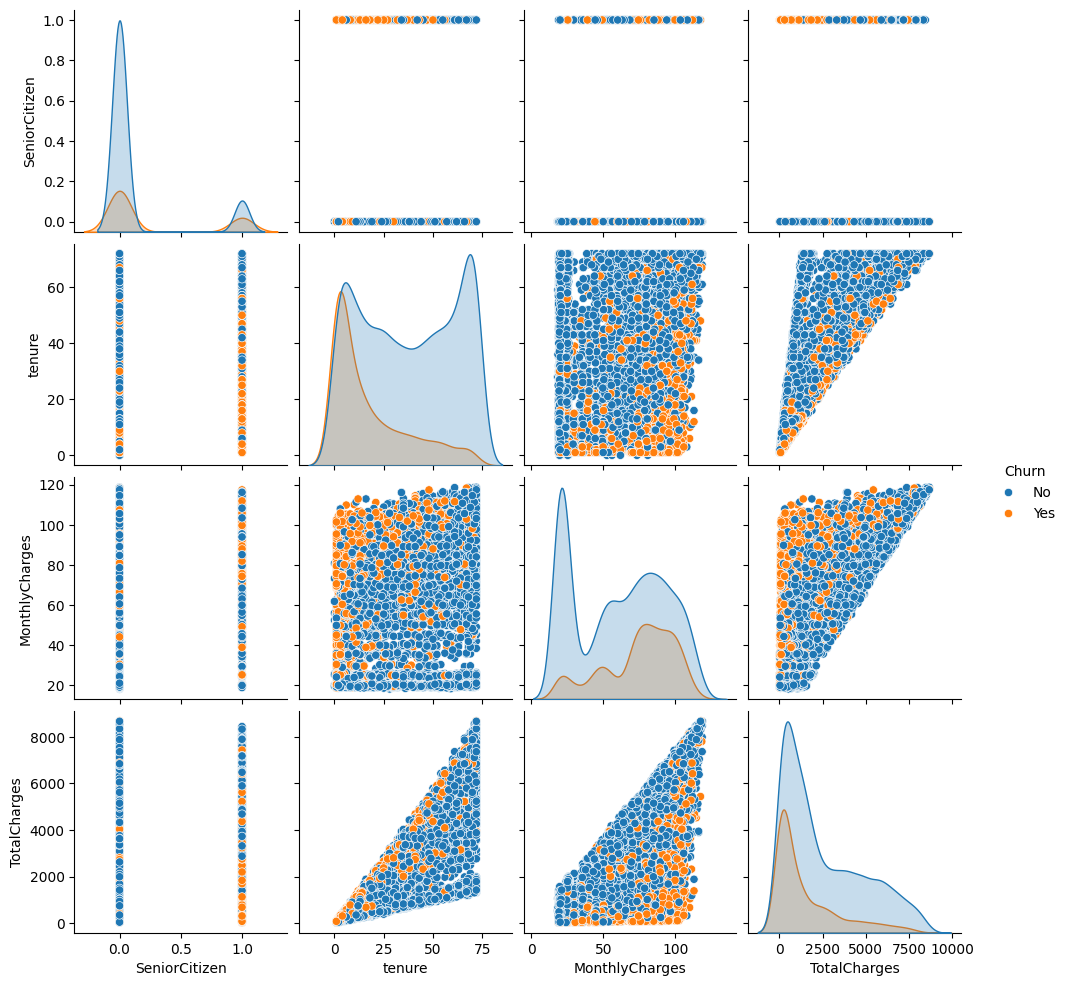

In [64]:
sns.pairplot(data, hue='Churn');

From the above scatterplots:-
- Customers with tenure below 40 but monthly charges above 80 churn more.
- Tenure and TotalCharges show positive correlation.
- Customers with MonthlyCharges above 75 and TotalCharges below 4000 also chur more.
- Senior citizens with tenure below 40, TotalCharges above 2000 and MonthlyCharges around 75 churn more.

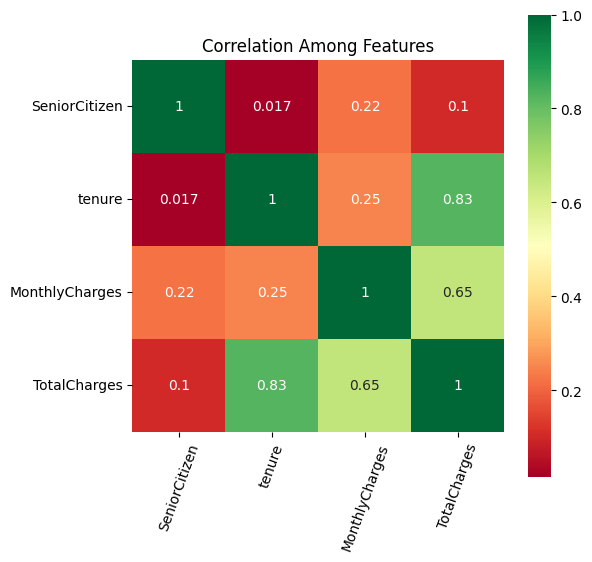

In [65]:
# Heatmap for Correlation between features

num_var = data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]
plt.figure(figsize=(6,6))
sns.heatmap(num_var.corr(), cbar=True, cmap='RdYlGn', annot=True, square=True, annot_kws={'size':10})
plt.title('Correlation Among Features')
plt.xticks(rotation=70)
plt.show()

The heatmap shows:-
- There is a strong positive correlation (0.83) between tenure and TotalCharges.
- Also, MonthlyCharges and TotalCharges also show strong positive correlation (0.65).

### DATA PREPROCESSING

In [66]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [67]:
# Drop unique identifier and other redundant features
data2 = data.drop(['customerID', 'Tenure_Grouping'], axis=1)
data2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Phone_and_InternetServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Yes


In [68]:
df = data2[data2['tenure'] <= 0]
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Phone_and_InternetServices
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,No


In [69]:
# Replace NaN in TotalCharges with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data2['TotalCharges'] = imputer.fit_transform(data2[['TotalCharges']])

In [70]:
new_df = data2[data2['tenure'] <= 0]
new_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Phone_and_InternetServices
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,1397.475,No,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,1397.475,No,No


In [71]:
# Import libraries to encode categorical features to numerical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### EXTRACT TARGET VARIABLE FROM DATASET 

In [72]:
# Separate dataset into predictor variables and target variable
target = data2.pop('Churn')
data2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Phone_and_InternetServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Yes


In [73]:
# Encode Target variable with LabelEncoder

targ_encoder = LabelEncoder()

target = targ_encoder.fit_transform(target)

In [74]:
# Create a variable of categorical features
cat_var = data2.dtypes == 'object'
cat_var[cat_var]

gender                        True
Partner                       True
Dependents                    True
PhoneService                  True
MultipleLines                 True
InternetService               True
OnlineSecurity                True
OnlineBackup                  True
DeviceProtection              True
TechSupport                   True
StreamingTV                   True
StreamingMovies               True
Contract                      True
PaperlessBilling              True
PaymentMethod                 True
Phone_and_InternetServices    True
dtype: bool

In [75]:
# Create a list of categorical variables
cat_feat = list(cat_var[cat_var].index)
cat_feat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Phone_and_InternetServices']

In [76]:
numerical_var = data2.select_dtypes(include= ["int64", "float64"])

In [77]:
categorical_var = data2.select_dtypes(include = "object")

In [78]:
# Normalise the dataset with StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate scaler
scaler = StandardScaler()

scaled_num_data = scaler.fit_transform(numerical_var)

scaled_num_df = pd.DataFrame(scaled_num_data, columns= numerical_var.columns)

scaled_num_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.994242
1,-0.439916,0.066327,-0.259629,-0.173244
2,-0.439916,-1.236724,-0.362660,-0.959674
3,-0.439916,0.514251,-0.746535,-0.194766
4,-0.439916,-1.236724,0.197365,-0.940470


In [79]:
# Encode Cat Var

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_cat_df = encoder.fit_transform(categorical_var)

encoded_column_names = encoder.get_feature_names_out(categorical_var.columns)

encoded_cat_df = pd.DataFrame(encoded_cat_df, columns=encoded_column_names)

encoded_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender_Male                            7043 non-null   float64
 1   Partner_Yes                            7043 non-null   float64
 2   Dependents_Yes                         7043 non-null   float64
 3   PhoneService_Yes                       7043 non-null   float64
 4   MultipleLines_No phone service         7043 non-null   float64
 5   MultipleLines_Yes                      7043 non-null   float64
 6   InternetService_Fiber optic            7043 non-null   float64
 7   InternetService_No                     7043 non-null   float64
 8   OnlineSecurity_No internet service     7043 non-null   float64
 9   OnlineSecurity_Yes                     7043 non-null   float64
 10  OnlineBackup_No internet service       7043 non-null   float64
 11  Onli

In [80]:
# Combine (Concatenate) the scaled numerical features and encoded categorical features
final_scaled_df = pd.concat([scaled_num_df, encoded_cat_df], axis=1)
final_scaled_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Phone_and_InternetServices_Yes
0,-0.439916,-1.277445,-1.160323,-0.994242,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.439916,0.066327,-0.259629,-0.173244,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,-0.439916,-1.236724,-0.362660,-0.959674,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,-0.439916,0.514251,-0.746535,-0.194766,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.439916,-1.236724,0.197365,-0.940470,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [81]:
final_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   float64
 1   tenure                                 7043 non-null   float64
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   float64
 5   Partner_Yes                            7043 non-null   float64
 6   Dependents_Yes                         7043 non-null   float64
 7   PhoneService_Yes                       7043 non-null   float64
 8   MultipleLines_No phone service         7043 non-null   float64
 9   MultipleLines_Yes                      7043 non-null   float64
 10  InternetService_Fiber optic            7043 non-null   float64
 11  Inte

### MACHINE LEARNING/MODEL BUILDING

In [82]:
# split dataset into training and validation sets (X = Questions, y = Answers)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_scaled_df, target, test_size=0.25, random_state=365)

In [83]:
# Import the Classifiers for model building

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [84]:
#instantiate the classifiers for model training and testing

#Logistic Regression Model
lr_mod = LogisticRegression()

# Decision Tree Regressor Model
dt_mod = DecisionTreeClassifier()

# Naive Bayes Model
nb_mod = GaussianNB()

# Neural Network Model
nn_mod = MLPClassifier()

# Random Forest Model
rf_mod = RandomForestClassifier()

# Support Vector Machine (Linear) Model
sv_mod = svm.SVC()

# Extreme Gradient Boosting (XGBoost) Model
xgb_mod = XGBClassifier()

# SGD Model
sgd_mod = SGDClassifier()

#instantiate the model and fit the training data
lr_mod.fit(x_train,y_train)
dt_mod.fit(x_train,y_train)
nb_mod.fit(x_train,y_train)
nn_mod.fit(x_train, y_train)
rf_mod.fit(x_train,y_train)
sv_mod.fit(x_train,y_train)
xgb_mod.fit(x_train,y_train)
sgd_mod.fit(x_train, y_train)

SGDClassifier()

In [85]:
#creating predictions
lr_pred = lr_mod.predict(x_test)
dt_pred = dt_mod.predict(x_test)
nb_pred = nb_mod.predict(x_test)
nn_pred = nn_mod.predict(x_test)
rf_pred = rf_mod.predict(x_test)
sv_pred = sv_mod.predict(x_test)
xgb_pred = xgb_mod.predict(x_test)
sgd_pred = sgd_mod.predict(x_test)

In [86]:
#lr_pred

In [87]:
#dt_pred

In [88]:
#nb_pred

In [89]:
#nn_pred

In [90]:
#rf_pred

In [91]:
#sv_pred

In [92]:
#xgb_pred

In [93]:
#sgd_pred

In [94]:
#kn_pred

### MODELS EVALUATION USING CLASSIFICATION REPORT AND CONFUSION MATRIX

In [95]:
# Model Evaluation. Import Evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create funtion to Visualize Confusion Matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, cmap='RdBu', annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [96]:
# Model evaluation for Logistic Regression model
print("Logistic Regression Model:\n", classification_report(y_test,lr_pred))

Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1281
           1       0.65      0.53      0.58       480

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



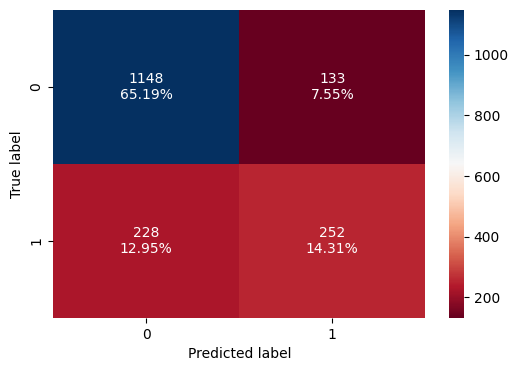

In [97]:
# Visualize Confusion Matrix for Logistic Regression model
confusion_matrix_sklearn(lr_mod,x_test,y_test)

In [98]:
# Model evaluation for Decision Tree model
print("Decision Tree Model:\n", classification_report(y_test,dt_pred))

Decision Tree Model:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1281
           1       0.48      0.48      0.48       480

    accuracy                           0.71      1761
   macro avg       0.64      0.64      0.64      1761
weighted avg       0.71      0.71      0.71      1761



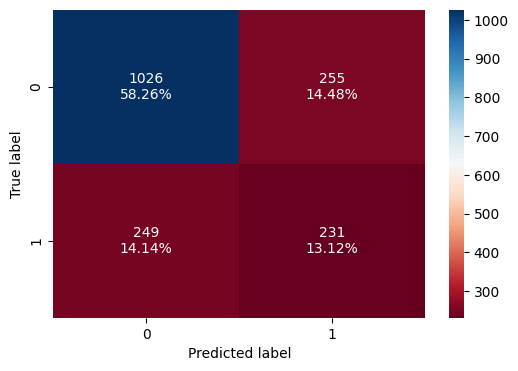

In [99]:
# Visualize Confusion Matrix for Decision Tree model
confusion_matrix_sklearn(dt_mod,x_test,y_test)

In [100]:
# Model evaluation for Naive Bayes model
print("Naive Bayes Model accuracy:\n", classification_report(y_test,nb_pred))

Naive Bayes Model accuracy:
               precision    recall  f1-score   support

           0       0.92      0.57      0.70      1281
           1       0.43      0.86      0.57       480

    accuracy                           0.65      1761
   macro avg       0.67      0.71      0.64      1761
weighted avg       0.78      0.65      0.66      1761



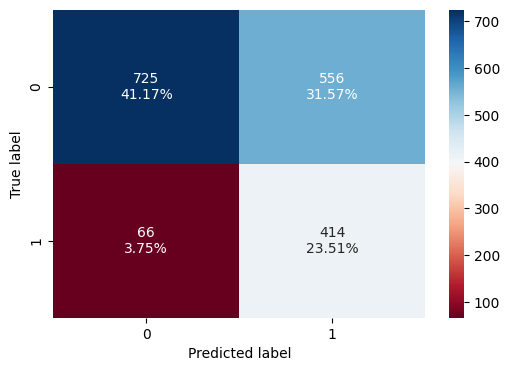

In [101]:
# Visualize Confusion Matrix for Naive Bayes model
confusion_matrix_sklearn(nb_mod,x_test,y_test)

In [102]:
# Model evaluation for Neural Network model
print("Neural Network Model:\n", classification_report(y_test,nn_pred))

Neural Network Model:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1281
           1       0.64      0.47      0.54       480

    accuracy                           0.78      1761
   macro avg       0.73      0.68      0.70      1761
weighted avg       0.77      0.78      0.77      1761



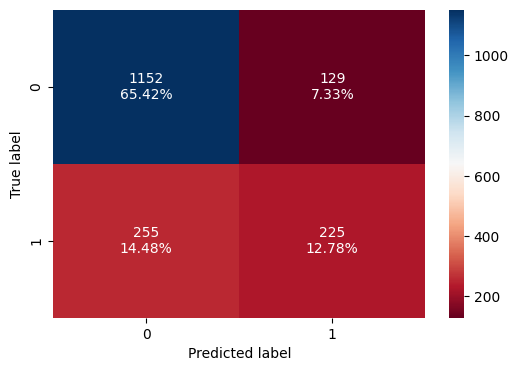

In [103]:
# Visualize Confusion Matrix for Neural Network model
confusion_matrix_sklearn(nn_mod,x_test,y_test)

In [104]:
# Model evaluation for Random Forest model
print("Random Forest Model:\n", classification_report(y_test,rf_pred))

Random Forest Model:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1281
           1       0.62      0.48      0.54       480

    accuracy                           0.78      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



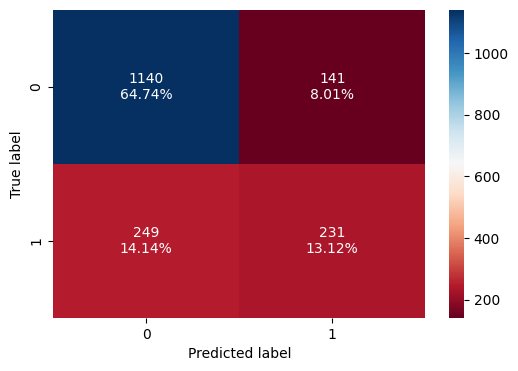

In [105]:
# Visualize Confusion Matrix for Random Forest model
confusion_matrix_sklearn(rf_mod,x_test,y_test)

In [106]:
# Model evaluation for Support Vector Machine model
print("Support Vector Machine Model:\n", classification_report(y_test,sv_pred))

Support Vector Machine Model:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1281
           1       0.68      0.45      0.54       480

    accuracy                           0.79      1761
   macro avg       0.75      0.69      0.70      1761
weighted avg       0.78      0.79      0.78      1761



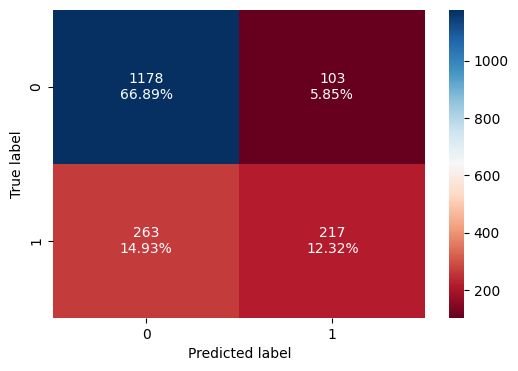

In [107]:
# Visualize Confusion Matrix for Support Vector Machine model
confusion_matrix_sklearn(sv_mod,x_test,y_test)

In [108]:
# Model evaluation for XGBoost model
print("XGBoost Model:\n", classification_report(y_test,xgb_pred))

XGBoost Model:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1281
           1       0.60      0.51      0.55       480

    accuracy                           0.77      1761
   macro avg       0.71      0.69      0.70      1761
weighted avg       0.77      0.77      0.77      1761



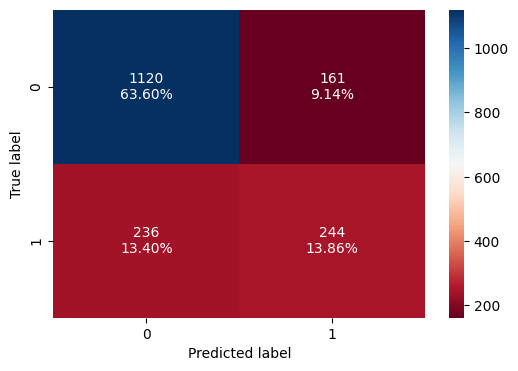

In [109]:
# Visualize Confusion Matrix for XGBoost model
confusion_matrix_sklearn(xgb_mod,x_test,y_test)

In [110]:
# Model evaluation for SGDClassifier model
print("SGDClassifier Model:\n", classification_report(y_test,sgd_pred))

SGDClassifier Model:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1281
           1       0.57      0.60      0.58       480

    accuracy                           0.77      1761
   macro avg       0.71      0.71      0.71      1761
weighted avg       0.77      0.77      0.77      1761



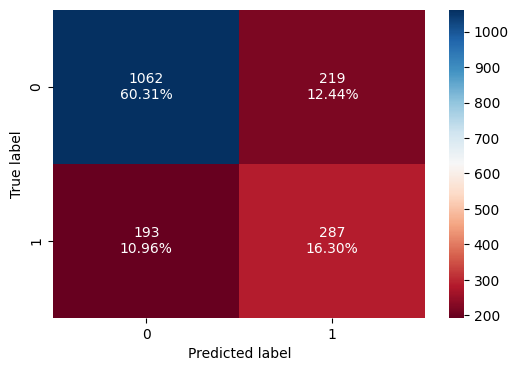

In [111]:
# Visualize Confusion Matrix for the SGDClassifier model
confusion_matrix_sklearn(sgd_mod,x_test,y_test)

In [112]:
models = ['Naive Bayes', 'Logistic Regression', 'Random Forest', 'Support Vector Machine', 'XGBoost', 'Decision Tree', 'Neural Network', 'SGDClassifier']
predictions = [nb_pred, lr_pred, rf_pred, sv_pred, xgb_pred, dt_pred, nn_pred, sgd_pred]

metrics = []
for model, preds in zip(models, predictions):
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    accuracy = accuracy_score(y_test, preds)
    metrics.append([model, precision, recall, f1, accuracy])

# Create DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Precision_Score', 'Recall_Score', 'F1_Score', 'Accuracy'])

# Display the DataFrame
print(metrics_df)

                    Model  Precision_Score  Recall_Score  F1_Score  Accuracy
0             Naive Bayes         0.783067      0.646792  0.664707  0.646792
1     Logistic Regression         0.785306      0.795003  0.787411  0.795003
2           Random Forest         0.766283      0.778535  0.768977  0.778535
3  Support Vector Machine         0.779501      0.792164  0.777488  0.792164
4                 XGBoost         0.765042      0.774560  0.768213  0.774560
5           Decision Tree         0.714921      0.713799  0.714352  0.713799
6          Neural Network         0.768836      0.781942  0.770581  0.781942
7           SGDClassifier         0.770162      0.766042  0.767927  0.766042


Of the 8 models,
Logistic Regression performed best with the highest scores in all of the metrics.

### HYPERPARAMETER OPTIMIZATION for the Top 4 Models

In [113]:
#lr_mod
#sv_mod
#sgd_mod
#nn_mod
#nb_mod

In [114]:
#import the necessary libraries
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint

#set up kfold
cv = KFold(n_splits=5,random_state=42,shuffle=True)

In [115]:
grid2 ={
     'var_smoothing' : uniform(1e-9, 1e-7),
     #'priors' : None
}

nb_mod_search = RandomizedSearchCV(
       estimator=nb_mod, 
       param_distributions=grid2, 
       n_iter=200, 
       cv=5
)
tuned_nb_mod = nb_mod_search.fit(x_train, y_train)

In [116]:
tuned_nb_mod.best_params_

{'var_smoothing': np.float64(5.073100132505528e-08)}

In [117]:
tuned_nb_pred = tuned_nb_mod.predict(x_test)

In [118]:
print("Optimized Naive Bayes Model accuracy:\n", classification_report(y_test,tuned_nb_pred))

Optimized Naive Bayes Model accuracy:
               precision    recall  f1-score   support

           0       0.92      0.57      0.70      1281
           1       0.43      0.86      0.57       480

    accuracy                           0.65      1761
   macro avg       0.67      0.71      0.64      1761
weighted avg       0.78      0.65      0.66      1761



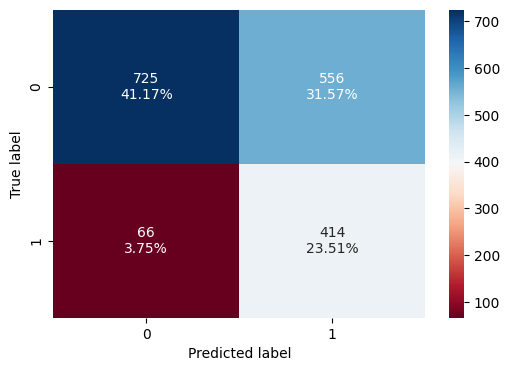

In [119]:
# Visualize confusion matrix for the optimized Naive Bayes model
confusion_matrix_sklearn(tuned_nb_mod,x_test,y_test)

In [120]:
# Logistic Regression Model
# Set up the grid to modify hyper parameters from
grid = {
    'C': [0.1, 1.0, 10.0],
    'multi_class': ['multinomial'],
    'solver': ['saga', 'liblinear'],
}

# Find the best hyperparameter combination to optimize the metric
lr_mod_search = RandomizedSearchCV(
    estimator=lr_mod,
    param_distributions=grid,
    n_iter=200,           
    cv=cv, 
    scoring=['accuracy', 'f1_micro'],
    refit='f1_micro',
    verbose=1,           
    random_state=42,     
    n_jobs=-1            
)

In [121]:
# Fit the optimized model on the training data set and train the model again
tuned_lr_mod = lr_mod_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [122]:
# Observing the best parameter combination
tuned_lr_mod.best_params_

{'solver': 'saga', 'multi_class': 'multinomial', 'C': 0.1}

In [123]:
# Create prediction
tuned_lr_pred = tuned_lr_mod.predict(x_test)

In [124]:
# Model evaluation for the Optimized Logistic Regression model
print("Optimized Linear Regression Model accuracy:\n", classification_report(y_test,tuned_lr_pred))

Optimized Linear Regression Model accuracy:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1281
           1       0.66      0.52      0.58       480

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



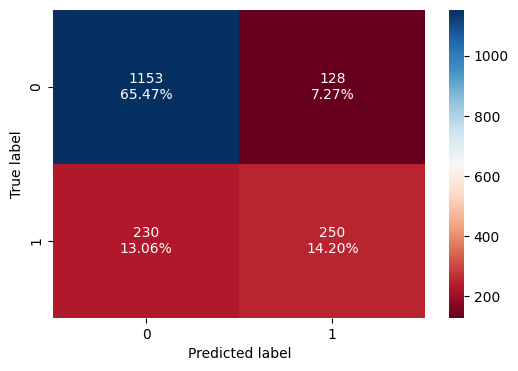

In [125]:
# Visualize confusion matrix for the optimized Logistic Regression model
confusion_matrix_sklearn(tuned_lr_mod,x_test,y_test)

In [126]:
# Neural Network Model
# Set up the grid to modify hyper parameters from
param_grd = {
    'hidden_layer_sizes': [(100,), (100, 50)], 
    'activation': ['relu', 'logistic', 'tanh'],  
    'solver': ['adam', 'sgd'],  
    'alpha': [0.0001, 0.001, 0.01], 
    'learning_rate': ['constant', 'adaptive'],  
}

# Find the best hyperparameter combination to optimize the metric
nn_mod_search=RandomizedSearchCV(
    estimator=nn_mod,
    param_distributions=param_grd,
    n_iter=200,           
    cv=cv, 
    scoring=['accuracy', 'f1_micro'],
    refit='f1_micro',
    verbose=1,         
    random_state=42,    
    n_jobs=-1            
)

In [127]:
# Fit the optimized model on the training data set and train the model again
tuned_nn_mod = nn_mod_search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [128]:
# Observing the best parameter combination
tuned_nn_mod.best_params_

{'solver': 'sgd',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (100, 50),
 'alpha': 0.0001,
 'activation': 'relu'}

In [129]:
# Create prediction
tuned_nn_pred = tuned_nn_mod.predict(x_test)

In [130]:
# Model evaluation for the Optimized Neura Network model
print("Optimized Neural Network Model accuracy:\n", classification_report(y_test,tuned_nn_pred))

Optimized Neural Network Model accuracy:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1281
           1       0.66      0.52      0.58       480

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



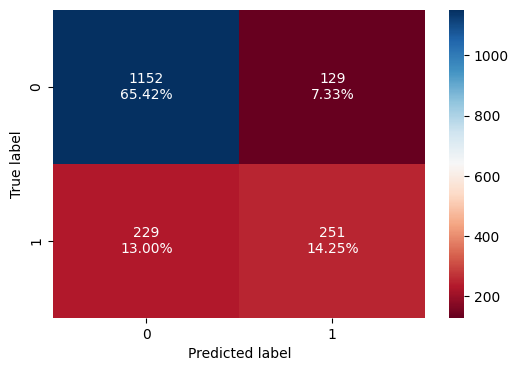

In [131]:
# Visualize confusion matrix for the optimized Neural Network model
confusion_matrix_sklearn(tuned_nn_mod,x_test,y_test)

In [132]:
# SVM Model
# Set up the grid to modify hyper parameters from
grid1 ={
    'C': uniform(0.1, 10),
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Find the best hyperparameter combination to optimize the metric
sv_mod_search=RandomizedSearchCV(
                            estimator=sv_mod,
                            param_distributions=grid1, 
                            n_iter=200, 
                            scoring=['accuracy', 'f1_micro'],
                            refit='f1_micro',
                            cv=cv,
                            n_jobs=-1,
                            random_state=42
)

In [133]:
# Fit the optimized model on the training data set and train the model again
tuned_sv_mod = sv_mod_search.fit(x_train, y_train)

In [134]:
# Observing the best parameter combination
tuned_sv_mod.best_params_

{'C': np.float64(1.832018699100152), 'gamma': 'auto', 'kernel': 'rbf'}

In [135]:
#creating a prediction
tuned_sv_pred = tuned_sv_mod.predict(x_test)
tuned_sv_pred

array([0, 0, 0, ..., 0, 0, 0])

In [136]:
# Model evaluation for the Optimized SVM model
print("Optimized SVM Model accuracy:\n", classification_report(y_test,tuned_sv_pred))

Optimized SVM Model accuracy:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1281
           1       0.68      0.44      0.53       480

    accuracy                           0.79      1761
   macro avg       0.75      0.68      0.70      1761
weighted avg       0.78      0.79      0.77      1761



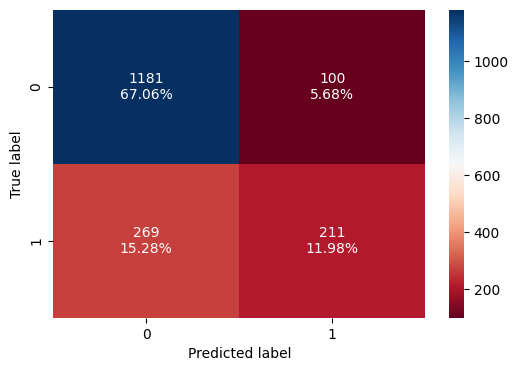

In [137]:
# Visualize confusion matrix for the optimized SVM model
confusion_matrix_sklearn(tuned_sv_mod,x_test,y_test)

In [138]:
# SGD Model
# Set up the grid to modify hyper parameters from
paramgrid = {
    'loss': ['hinge', 'log', 'modified_huber'],  
    'penalty': ['l1', 'l2', 'elasticnet'],        
    'alpha': uniform(0.0001, 0.001),              
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'] 
}

# Create an instance of the SGDClassifier model
sgd_model = SGDClassifier(max_iter=1000, tol=1e-3)

# Find the best hyperparameter combination to optimize the metric
sgd_mod_search = RandomizedSearchCV(
    estimator=sgd_mod,
    param_distributions=paramgrid,
    n_iter=200,
    scoring=['accuracy', 'f1_micro'],
    refit='f1_micro',
    cv=cv,                 
    verbose=1,          
    random_state=42,     
    n_jobs=-1
)

In [139]:
# Fit the optimized model on the training data set and train the model again
tuned_sgd_mod = sgd_mod_search.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [140]:
# Observing the best parameter combination
tuned_sgd_mod.best_params_

{'alpha': np.float64(0.00042078006497173583),
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'penalty': 'elasticnet'}

In [141]:
# Create prediction
tuned_sgd_pred = tuned_sgd_mod.predict(x_test)

In [142]:
# Model evaluation for the Optimized SGD model
print("Optimized SGD Model accuracy:\n", classification_report(y_test,tuned_sgd_pred))

Optimized SGD Model accuracy:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86      1281
           1       0.72      0.26      0.39       480

    accuracy                           0.77      1761
   macro avg       0.75      0.61      0.62      1761
weighted avg       0.76      0.77      0.73      1761



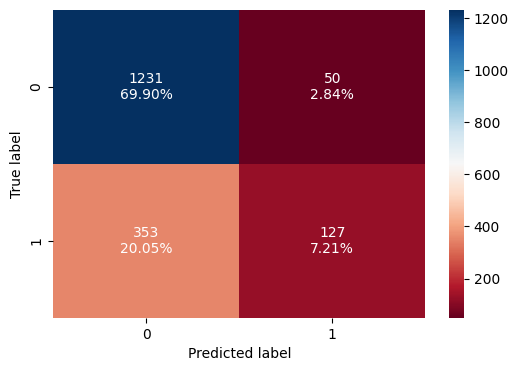

In [143]:
# Visualize confusion matrix for the optimized SGD model
confusion_matrix_sklearn(tuned_sgd_mod,x_test,y_test)

In [144]:
grid1 ={
    "n_estimators": [50,100,150],
    "max_features": [7, 10, 15],
    "min_samples_leaf": [1, 5, 20, 100],
    "min_samples_split": [2, 10, 50, 250],
    "criterion": ["gini","entropy"],
    "max_depth": [4, 6, 8, 10, None]
}

# Find the best hyperparameter combination to optimize the R2 metric
rf_mod_search=RandomizedSearchCV(
    estimator=rf_mod,
    param_distributions=grid1,
    n_iter=200,
    refit=True,
    return_train_score=True,
    cv=cv,
    verbose=10,
    n_jobs=-1,
    random_state=42
)

In [145]:
# Fit the optimized model on the training data set and train the model again
tuned_rf_mod = rf_mod_search.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [146]:
# Observing the best parameter combination
tuned_rf_mod.best_params_

{'n_estimators': 150,
 'min_samples_split': 50,
 'min_samples_leaf': 1,
 'max_features': 7,
 'max_depth': None,
 'criterion': 'entropy'}

In [147]:
# Create prediction
tuned_rf_pred = tuned_rf_mod.predict(x_test)

In [148]:
# Model evaluation for the Optimized Random Forest model
print("Optimized Random Forest Model accuracy:\n", classification_report(y_test,tuned_rf_pred))

Optimized Random Forest Model accuracy:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1281
           1       0.64      0.49      0.56       480

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



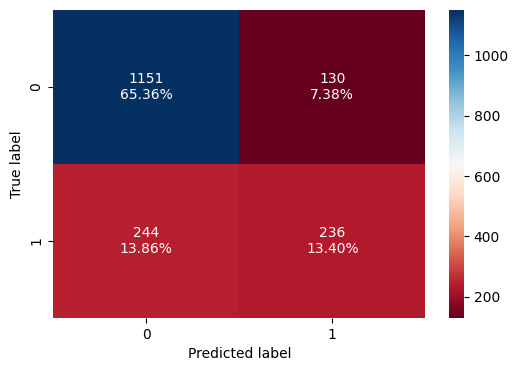

In [149]:
# Visualize confusion matrix for the optimized Random Forest model
confusion_matrix_sklearn(tuned_rf_mod,x_test,y_test)

In [150]:
models = ['Naive Bayes', 'Logistic Regression', 'Support Vector Machine', 'Neural Network', 'SGDClassifier']
predictions = [tuned_nb_pred, tuned_lr_pred, tuned_sv_pred, tuned_nn_pred, tuned_sgd_pred]

metrics = []
for model, preds in zip(models, predictions):
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    accuracy = accuracy_score(y_test, preds)
    metrics.append([model, precision, recall, f1, accuracy])

# Create DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Precision_Score', 'Recall_Score', 'F1_Score', 'Accuracy'])

# Display the DataFrame
print(metrics_df)

                    Model  Precision_Score  Recall_Score  F1_Score  Accuracy
0             Naive Bayes         0.783067      0.646792  0.664707  0.646792
1     Logistic Regression         0.786725      0.796706  0.788514  0.796706
2  Support Vector Machine         0.777406      0.790460  0.774559  0.790460
3          Neural Network         0.786845      0.796706  0.788705  0.796706
4           SGDClassifier         0.760892      0.771153  0.730483  0.771153


### SAVE BEST OPTIMIZED MODEL/SCALER/ENCODER

In [151]:
# Save the best performing model as pickle file

import pickle

with open('tuned_lr_mod.pkl', 'wb') as file:
    pickle.dump(tuned_lr_mod, file)

In [152]:
# Save the Numerical Scaler
with open('num_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [153]:
# Save the Categorical Encoder
with open('cat_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [154]:
# Create a function for data preprocessing/save model/scaler/encoder

with open("cat_encoder.pkl", "rb") as file:
    encoder = pickle.load(file)

with open("num_scaler.pkl", "rb") as file:
    scaler = pickle.load(file)

with open("tuned_lr_mod.pkl", "rb") as file:
    model = pickle.load(file)

def transform_data(df):
    numerical_var = df.select_dtypes(include = ["int64", "float64"])
    categorical_var = df.select_dtypes(include = "object")

    # Scale numerical entries
    scaled_num_df = scaler.transform(numerical_var)
    scaled_num_df = pd.DataFrame(scaled_num_df, columns= numerical_var.columns)

    # Encode categorical entries
    encoded_cat_df = encoder.transform(categorical_var)
    encoded_column_names = encoder.get_feature_names_out(categorical_var.columns)

    encoded_cat_df = pd.DataFrame(encoded_cat_df, columns=encoded_column_names)

    # Merge both
    final_scaled_df = pd.concat([scaled_num_df, encoded_cat_df], axis=1)

    return final_scaled_df

### Feature Importance Using The Model's Coefficients.

In [165]:
# Access the best model from RandomizedSearchCV
best_lr_model = tuned_lr_mod.best_estimator_

# Extract the feature names
feature_names = x_train.columns

# Get the feature importances (coefficients) from the trained model
feature_importances = best_lr_model.coef_[0]

# Create a DataFrame to organize the feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

                                  Feature  Importance
10            InternetService_Fiber optic    0.313940
3                            TotalCharges    0.231891
26                   PaperlessBilling_Yes    0.169863
23                    StreamingMovies_Yes    0.130108
28         PaymentMethod_Electronic check    0.119713
8          MultipleLines_No phone service    0.116988
9                       MultipleLines_Yes    0.093468
21                        StreamingTV_Yes    0.091743
2                          MonthlyCharges    0.070077
0                           SeniorCitizen    0.053334
5                             Partner_Yes   -0.003693
29             PaymentMethod_Mailed check   -0.008661
4                             gender_Male   -0.022037
17                   DeviceProtection_Yes   -0.032786
6                          Dependents_Yes   -0.049715
15                       OnlineBackup_Yes   -0.054239
30         Phone_and_InternetServices_Yes   -0.055261
16   DeviceProtection_No int

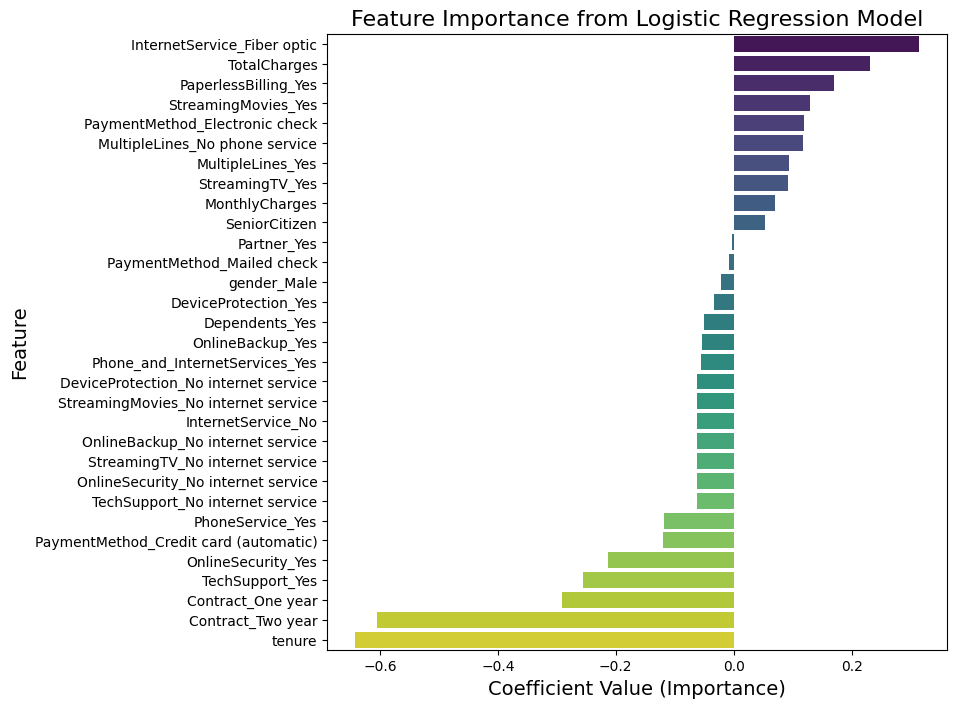

In [161]:
# Create a bar plot for feature importance
plt.figure(figsize=(8, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# Add titles and labels
plt.title('Feature Importance from Logistic Regression Model', fontsize=16)
plt.xlabel('Coefficient Value (Importance)', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.show()